# Phase 1A: Project Introduction & Dataset Deep Dive

## Project Introduction

**Goal:** To predict if an Instacart customer will buy a **new product** (one they haven't purchased previously) in their next order, using their past shopping behavior.

**Application:** This prediction can help Instacart understand customer exploration habits and potentially optimize marketing efforts aimed at introducing new items. It acts as a proxy for identifying customers open to trying something different.

## Dataset Overview

We are using the public "Instacart Market Basket Analysis" dataset. This dataset describes customer grocery orders over time. It's *relational*, meaning the information is split across multiple files (tables) linked by unique IDs. Understanding these files and their connections is key.

Let's load and inspect each one.

In [168]:
# Import necessary libraries
import pandas as pd
import numpy as np
import os

# --- Configuration ---
# Define the path to the directory containing the CSV files
# Adjust this path if your data is located elsewhere relative to the notebook
data_path = 'data'
print(f"Data path set to: {os.path.abspath(data_path)}")

# Using appropriate data types for memory efficiency & performance
orders_dtypes = {
    'order_id': 'int32', 'user_id': 'int32', 'order_number': 'int16',
    'order_dow': 'int8', 'order_hour_of_day': 'int8', 'days_since_prior_order': 'float32'
}
products_dtypes = {
    'product_id': 'int32', 'aisle_id': 'int16', 'department_id': 'int8'
}
order_products_dtypes = {
    'order_id': 'int32', 'product_id': 'int32',
    'add_to_cart_order': 'int16', 'reordered': 'int8'
}
aisles_dtypes = {'aisle_id': 'int16'}
departments_dtypes = {'department_id': 'int8'}

Data path set to: /Users/chidiogoonoh/Projects/kaggle/instacart/data


### 1. `orders.csv` - The Order Log

*   **Purpose:** Contains metadata about each customer order. The central hub linking users to their order sequence.
*   **Key Columns:** `order_id`, `user_id`, `eval_set` (prior/train/test), `order_number`, `order_dow`, `order_hour_of_day`, `days_since_prior_order`.

In [169]:
try:
    orders_df = pd.read_csv(os.path.join(data_path, 'orders.csv'), dtype=orders_dtypes)
    print("--- Examining orders.csv ---")
    orders_df.info()
    print("\nValue Counts for 'eval_set':")
    print(orders_df['eval_set'].value_counts())
    print("\nFirst 5 Rows:")
    print(orders_df.head())
    print("-" * 60)
except FileNotFoundError:
    print(f"ERROR: orders.csv not found in {data_path}.")
    orders_df = pd.DataFrame()

--- Examining orders.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   eval_set                object 
 3   order_number            int16  
 4   order_dow               int8   
 5   order_hour_of_day       int8   
 6   days_since_prior_order  float32
dtypes: float32(1), int16(1), int32(2), int8(2), object(1)
memory usage: 78.3+ MB

Value Counts for 'eval_set':
eval_set
prior    3214874
train     131209
test       75000
Name: count, dtype: int64

First 5 Rows:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2

### 2. `products.csv` - The Product Catalog

*   **Purpose:** Lists all unique products available.
*   **Key Columns:** `product_id`, `product_name`, `aisle_id`, `department_id`.

In [170]:
try:
    products_df = pd.read_csv(os.path.join(data_path, 'products.csv'), dtype=products_dtypes)
    print("--- Examining products.csv ---")
    products_df.info()
    print("\nFirst 5 Rows:")
    print(products_df.head())
    # Note: product_name has no specific dtype in read_csv, pandas infers it (usually 'object')
    print("-" * 60)
except FileNotFoundError:
    print(f"ERROR: products.csv not found in {data_path}.")
    products_df = pd.DataFrame()

--- Examining products.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int32 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int16 
 3   department_id  49688 non-null  int8  
dtypes: int16(1), int32(1), int8(1), object(1)
memory usage: 728.0+ KB

First 5 Rows:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1         

### 3. `order_products__prior.csv` & `order_products__train.csv` - Order Contents

*   **Purpose:** Detail exactly *which products* were in *which order*. Connects orders to products.
    *   `__prior.csv`: Contents of past orders (most history). Very large file.
    *   `__train.csv`: Contents of the specific 'train' orders used for defining our target.
*   **Key Columns:** `order_id`, `product_id`, `add_to_cart_order`, `reordered` (1 if bought previously by user, 0 if first time).

In [171]:
try:
    # Load the large prior file
    order_products_prior_df = pd.read_csv(os.path.join(data_path, 'order_products__prior.csv'), dtype=order_products_dtypes)
    print("--- Examining order_products__prior.csv ---")
    order_products_prior_df.info() # .info() might be slow here
    print("\nValue Counts for 'reordered':")
    # Value counts can also be slow, calculate carefully if needed on full data
    print(order_products_prior_df['reordered'].value_counts(normalize=True)) # Show percentage
    print("\nFirst 5 Rows:")
    print(order_products_prior_df.head())
    print("-" * 60)
except FileNotFoundError:
    print(f"ERROR: order_products__prior.csv not found in {data_path}.")
    order_products_prior_df = pd.DataFrame()

--- Examining order_products__prior.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int32
 1   product_id         int32
 2   add_to_cart_order  int16
 3   reordered          int8 
dtypes: int16(1), int32(2), int8(1)
memory usage: 340.3 MB

Value Counts for 'reordered':
reordered
1    0.589697
0    0.410303
Name: proportion, dtype: float64

First 5 Rows:
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
------------------------------------------------------------


In [172]:
try:
    order_products_train_df = pd.read_csv(os.path.join(data_path, 'order_products__train.csv'), dtype=order_products_dtypes)
    print("--- Examining order_products__train.csv ---")
    order_products_train_df.info()
    print("\nValue Counts for 'reordered':")
    print(order_products_train_df['reordered'].value_counts(normalize=True)) # Show percentage
    print("\nFirst 5 Rows:")
    print(order_products_train_df.head())
    print("-" * 60)
except FileNotFoundError:
    print(f"ERROR: order_products__train.csv not found in {data_path}.")
    order_products_train_df = pd.DataFrame()

--- Examining order_products__train.csv ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int32
 1   product_id         1384617 non-null  int32
 2   add_to_cart_order  1384617 non-null  int16
 3   reordered          1384617 non-null  int8 
dtypes: int16(1), int32(2), int8(1)
memory usage: 14.5 MB

Value Counts for 'reordered':
reordered
1    0.598594
0    0.401406
Name: proportion, dtype: float64

First 5 Rows:
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
---------------------------------------------------------

### 4. `aisles.csv` & `departments.csv` - Category Lookups

*   **Purpose:** Translate `aisle_id` and `department_id` into human-readable names.
*   **Columns:** `aisle_id`, `aisle` (name); `department_id`, `department` (name).
*   *We'll load these if/when needed for feature engineering or interpretation.*

In [173]:
# Optional: Load these now if you anticipate needing them soon, or load later.
# try:
#     aisles_df = pd.read_csv(os.path.join(data_path, 'aisles.csv'), dtype=aisles_dtypes)
#     departments_df = pd.read_csv(os.path.join(data_path, 'departments.csv'), dtype=departments_dtypes)
#     print("--- Examining aisles.csv ---")
#     aisles_df.info()
#     print(aisles_df.head())
#     print("\n--- Examining departments.csv ---")
#     departments_df.info()
#     print(departments_df.head())
#     print("-" * 60)
# except FileNotFoundError:
#     print(f"ERROR: aisles.csv or departments.csv not found in {data_path}.")
#     aisles_df = pd.DataFrame()
#     departments_df = pd.DataFrame()

### How They Connect

*   `orders` links to `order_products__*` via `order_id`.
*   `products` links to `order_products__*` via `product_id`.
*   `products` links to `aisles` and `departments` via their respective IDs.

This structure allows us to trace every item purchased in every order back to the user and the product's details.

# Phase 2: Defining What We Predict (The Target Variable)

Our goal is to predict if a customer will try a **new product**. Since the dataset doesn't explicitly track marketing interactions, we need a proxy measure based on purchase behavior.

We define our target variable using the `'eval_set'` column in `orders.csv`:
1.  We identify orders marked as `'train'`. These represent the "next order" for a subset of users.
2.  We look at the products purchased in these `'train'` orders (using `order_products__train.csv`).
3.  We compare these products to the customer's *entire* purchase history from *all* their orders marked as `'prior'` (using `orders.csv` and `order_products__prior.csv`).

**Target Variable (`new_product_purchased`):**
*   **1 (Yes):** If the customer's `'train'` order contains at least one product they had **never** purchased in *any* of their `'prior'` orders.
*   **0 (No):** If *all* products in the customer's `'train'` order were products they had purchased at least once in their `'prior'` orders.

This binary variable (0 or 1) will be what our machine learning model tries to predict.

**Output:** The code below will generate a DataFrame named `final_target_df` containing two columns: `user_id` and our calculated `new_product_purchased` target variable for each user included in the 'train' set.

In [174]:
import pandas as pd
import numpy as np
import gc # Garbage collector for memory management
import time

print("--- Phase 2: Calculating Target Variable ---")
start_time = time.time()

# Ensure required DataFrames (orders_df, order_products_prior_df, etc.)
# are loaded from Phase 0 before running this cell.

# 1. Identify users and 'train' order_id
train_orders = orders_df[orders_df['eval_set'] == 'train'][['user_id', 'order_id']].copy()
target_user_ids = train_orders['user_id'].unique()

# 2. Get products in 'train' orders
train_order_contents = train_orders.merge(
    order_products_train_df[['order_id', 'product_id']],
    on='order_id',
    how='left'
)
train_order_contents['product_id'] = train_order_contents['product_id'].fillna(-1) # Handle empty orders
train_products_by_user = train_order_contents.groupby('user_id')['product_id'].apply(set).reset_index()
train_products_by_user.rename(columns={'product_id': 'train_product_set'}, inplace=True)
train_products_by_user['train_product_set'] = train_products_by_user['train_product_set'].apply(lambda s: s - {-1}) # Remove placeholder

# 3. Get 'prior' order_ids for target users
prior_orders_for_target_users = orders_df[
    (orders_df['user_id'].isin(target_user_ids)) &
    (orders_df['eval_set'] == 'prior')
][['order_id', 'user_id']].copy()

# 4. Get products in these 'prior' orders
prior_order_contents = prior_orders_for_target_users.merge(
    order_products_prior_df[['order_id', 'product_id']],
    on='order_id',
    how='inner'
)

# 5. Aggregate set of all prior products per user
user_prior_products = prior_order_contents.groupby('user_id')['product_id'].apply(set).reset_index()
user_prior_products.rename(columns={'product_id': 'prior_product_set'}, inplace=True)

# Clean up large intermediate dataframe
del prior_order_contents
del prior_orders_for_target_users
gc.collect()

# 6. Merge train and prior product sets
user_sets = train_products_by_user.merge(user_prior_products, on='user_id', how='left')
user_sets['prior_product_set'] = user_sets['prior_product_set'].apply(lambda x: x if isinstance(x, set) else set()) # Handle users with no prior orders

# 7. Define function to check for new products
def check_new_products_purchased(row):
    new_items = row['train_product_set'].difference(row['prior_product_set'])
    return 1 if len(new_items) > 0 else 0

# 8. Apply function to create the target column
user_sets['new_product_purchased'] = user_sets.apply(check_new_products_purchased, axis=1)

# 9. Create the final target DataFrame
final_target_df = user_sets[['user_id', 'new_product_purchased']].copy()

# Clean up intermediate dataframes
del user_sets
del train_products_by_user
del user_prior_products
del train_orders
del train_order_contents
gc.collect()

end_time = time.time()
# Final confirmation prints are kept
print(f"\nTarget Variable Calculation Complete. Time taken: {end_time - start_time:.2f} seconds.")
print("\nFinal Target DataFrame (`final_target_df`) Head:")
print(final_target_df.head())
print("\nTarget Variable Distribution (Normalized):")
print(final_target_df['new_product_purchased'].value_counts(normalize=True))
print("(1 = Bought >=1 new product, 0 = Bought only previously purchased products)")
print("-" * 50)

--- Phase 2: Calculating Target Variable ---

Target Variable Calculation Complete. Time taken: 8.86 seconds.

Final Target DataFrame (`final_target_df`) Head:
   user_id  new_product_purchased
0        1                      1
1        2                      1
2        5                      1
3        7                      1
4        8                      1

Target Variable Distribution (Normalized):
new_product_purchased
1    0.815554
0    0.184446
Name: proportion, dtype: float64
(1 = Bought >=1 new product, 0 = Bought only previously purchased products)
--------------------------------------------------


# Phase 3: Feature Engineering - Simple Descriptions

## Why Features?

To predict whether a user will buy a new product (`new_product_purchased` = 1 or 0), our machine learning model needs information *about* that user based on their **past behavior**. We can't just feed the raw transaction history into a simple model like Logistic Regression.

Instead, we **engineer features**: descriptive statistics calculated from the user's `'prior'` order history that summarize their typical shopping habits. The model will then learn the relationship between these summary features and the target variable.

## Target Variable Distribution Recap

From Phase 2, we found the distribution of our target variable (`new_product_purchased`):
*   **~81.6%** of users bought at least one new product (value = 1).
*   **~18.4%** of users bought only previously purchased products (value = 0).

This **imbalance** is important. It means most users in our target group *do* try new things. We need to keep this in mind when evaluating our model later – simply guessing "1" for everyone would be ~81.6% accurate but not very useful. 

## Creating Initial Features

We will now calculate a few basic features for each user, using **only their order history marked as `'prior'`**:

1.  `user_total_orders`: Total number of prior orders placed. (Indicates experience/history length).
2.  `user_avg_days_since_prior`: Average number of days between prior orders. (Indicates typical purchase frequency).
3.  `user_avg_basket_size`: Average number of items purchased per prior order. (Indicates typical order size).
4.  `user_reorder_ratio`: Overall proportion of items purchased across all prior orders that were reorders. (Indicates tendency to stick to known items vs. explore).

These features provide a simple numerical profile of each user's past behavior.

In [175]:
import pandas as pd
import numpy as np
import gc
import time

print("--- Phase 3: Calculating Initial Features ---")
start_time = time.time()

# Ensure required DataFrames (orders_df, order_products_prior_df, final_target_df) are available.
# We only calculate features for users we have a target for.
target_users = final_target_df['user_id'].unique()

# --- Filter data to relevant users and 'prior' orders ---
orders_prior_filtered_df = orders_df[
    (orders_df['user_id'].isin(target_users)) &
    (orders_df['eval_set'] == 'prior')
].copy()

# Merge prior orders with their products (only for relevant users)
# This merge is necessary for basket size and reorder ratio
order_products_prior_filtered_df = orders_prior_filtered_df[['order_id', 'user_id']].merge(
    order_products_prior_df[['order_id', 'product_id', 'reordered']],
    on='order_id',
    how='inner'
)

# --- Calculate Features ---

# 1. user_total_orders
# Max order_number from the filtered prior orders for each user
user_orders_count = orders_prior_filtered_df.groupby('user_id')['order_number'].max().reset_index()
user_orders_count.rename(columns={'order_number': 'user_total_orders'}, inplace=True)

# 2. user_avg_days_since_prior
# Calculated from filtered prior orders. NaNs are implicitly ignored by mean().
user_days_since = orders_prior_filtered_df.groupby('user_id')['days_since_prior_order'].mean().reset_index()
user_days_since.rename(columns={'days_since_prior_order': 'user_avg_days_since_prior'}, inplace=True)
# Handle users with only 1 prior order (mean is NaN) -> fill with 0 or another value. 0 implies no gap history yet.
user_days_since['user_avg_days_since_prior'].fillna(0, inplace=True)

# 3. user_avg_basket_size
# Requires the merged order_products_prior_filtered_df
# First, find size of each prior order
prior_basket_sizes = order_products_prior_filtered_df.groupby(['user_id', 'order_id'])['product_id'].count().reset_index(name='basket_size')
# Then, average basket size per user
user_avg_basket = prior_basket_sizes.groupby('user_id')['basket_size'].mean().reset_index()
user_avg_basket.rename(columns={'basket_size': 'user_avg_basket_size'}, inplace=True)

# 4. user_reorder_ratio
# Requires the merged order_products_prior_filtered_df
# Calculate the mean of the 'reordered' flag for all items purchased by the user in prior orders
user_reorder_rate = order_products_prior_filtered_df.groupby('user_id')['reordered'].mean().reset_index()
user_reorder_rate.rename(columns={'reordered': 'user_reorder_ratio'}, inplace=True)
# Handle potential edge cases (e.g., user with prior orders but 0 items? Unlikely but safe)
user_reorder_rate['user_reorder_ratio'].fillna(0, inplace=True)


# --- Combine Features into a single DataFrame ---
# Start with the user list from the target df
features_df = pd.DataFrame({'user_id': target_users})

# Merge calculated features
features_df = features_df.merge(user_orders_count, on='user_id', how='left')
features_df = features_df.merge(user_days_since, on='user_id', how='left')
features_df = features_df.merge(user_avg_basket, on='user_id', how='left')
features_df = features_df.merge(user_reorder_rate, on='user_id', how='left')

# Check for any NaNs introduced by merges (shouldn't happen if all target_users had prior orders)
print("\nChecking for missing values in features_df:")
print(features_df.isnull().sum())
# Optional: Fill any unexpected NaNs, though ideally the logic prevents them for this user set.
# features_df.fillna(0, inplace=True) # Example fill

# Clean up intermediate dataframes
del orders_prior_filtered_df
del order_products_prior_filtered_df
del user_orders_count
del user_days_since
del prior_basket_sizes
del user_avg_basket
del user_reorder_rate
gc.collect()

end_time = time.time()
print(f"\nFeature Calculation Complete. Time taken: {end_time - start_time:.2f} seconds.")
print("\nFinal Features DataFrame (`features_df`) Head:")
print(features_df.head())
print(f"\nFeatures DataFrame Shape: {features_df.shape}")
print("-" * 50)

--- Phase 3: Calculating Initial Features ---


/var/folders/51/pys4jc71057cwt5cvjb3qqh80000gn/T/ipykernel_24688/2386543792.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_days_since['user_avg_days_since_prior'].fillna(0, inplace=True)



Checking for missing values in features_df:
user_id                      0
user_total_orders            0
user_avg_days_since_prior    0
user_avg_basket_size         0
user_reorder_ratio           0
dtype: int64

Feature Calculation Complete. Time taken: 3.98 seconds.

Final Features DataFrame (`features_df`) Head:
   user_id  user_total_orders  user_avg_days_since_prior  \
0        1                 10                  19.555555   
1        2                 14                  15.230769   
2        5                  4                  13.333333   
3        7                 20                  10.684211   
4        8                  3                  30.000000   

   user_avg_basket_size  user_reorder_ratio  
0              5.900000            0.694915  
1             13.928571            0.476923  
2              9.250000            0.378378  
3             10.300000            0.669903  
4             16.333333            0.265306  

Features DataFrame Shape: (131209, 5)
------

/var/folders/51/pys4jc71057cwt5cvjb3qqh80000gn/T/ipykernel_24688/2386543792.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  user_reorder_rate['user_reorder_ratio'].fillna(0, inplace=True)


# Phase 4: Preparing Data for Modeling

Now that we have:
1.  `final_target_df`: Contains the `user_id` and the target variable (`new_product_purchased`) we want to predict.
2.  `features_df`: Contains the `user_id` and the descriptive features calculated from past behavior.

We need to combine these and prepare them for the machine learning model. This involves two main steps:

1.  **Merging:** Combine the features and the target variable into a single dataset aligned by `user_id`.
2.  **Splitting:** Divide this combined dataset into a **Training Set** and a **Testing Set**.
    *   **Why Split?** We train the model on the Training Set and evaluate its performance on the unseen Testing Set. This tells us how well the model generalizes to new data it hasn't learned from directly, helping us avoid overfitting (where the model just memorizes the training data).
    *   **Why Stratify?** As noted before, our target variable is imbalanced (~81.6% class 1, ~18.4% class 0). Stratified splitting ensures both the training and testing sets maintain this same proportion, leading to a more reliable evaluation.

In [176]:
import pandas as pd
from sklearn.model_selection import train_test_split

print("--- Phase 4: Preparing Data for Modeling ---")

# 1. Merge Features and Target
# Ensure both final_target_df and features_df exist and have user_id
if 'final_target_df' in locals() and 'features_df' in locals():
    model_data_df = pd.merge(features_df, final_target_df, on='user_id', how='inner')
    print(f"Merged data shape: {model_data_df.shape}")

    # Separate features (X) and target (y)
    # Features are all columns except user_id and the target variable
    X = model_data_df.drop(columns=['user_id', 'new_product_purchased'])
    y = model_data_df['new_product_purchased']

    # Get feature names for later use
    feature_names = X.columns.tolist()

    print(f"Features (X) shape: {X.shape}")
    print(f"Target (y) shape: {y.shape}")
    print(f"Features used for modeling: {feature_names}")

    # 2. Split Data into Training and Testing Sets (Stratified)
    # Using 80% for training, 20% for testing
    test_set_size = 0.20
    # Use a fixed random_state for reproducibility
    reproducible_state = 42

    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=test_set_size,
        random_state=reproducible_state,
        stratify=y # CRITICAL for maintaining class proportions
    )

    print("\nData Splitting Complete.")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print("\nTraining set target distribution:")
    print(y_train.value_counts(normalize=True))
    print("\nTesting set target distribution:")
    print(y_test.value_counts(normalize=True))
    # Check that train/test distributions are very close to the original (~81.6% / ~18.4%)
    print("-" * 50)

else:
    print("ERROR: `final_target_df` or `features_df` not found. Cannot proceed.")

--- Phase 4: Preparing Data for Modeling ---
Merged data shape: (131209, 6)
Features (X) shape: (131209, 4)
Target (y) shape: (131209,)
Features used for modeling: ['user_total_orders', 'user_avg_days_since_prior', 'user_avg_basket_size', 'user_reorder_ratio']

Data Splitting Complete.
X_train shape: (104967, 4)
X_test shape: (26242, 4)

Training set target distribution:
new_product_purchased
1    0.815552
0    0.184448
Name: proportion, dtype: float64

Testing set target distribution:
new_product_purchased
1    0.815563
0    0.184437
Name: proportion, dtype: float64
--------------------------------------------------


# Phase 5: Building and Evaluating a Baseline Model

Now we'll build our first predictive model. We start with a simple but effective algorithm called **Logistic Regression**.

## Logistic Regression

*   **What it is:** A statistical method used for binary classification (predicting one of two outcomes, like our 0 or 1).
*   **How it works (simplified):** It learns a linear relationship between the input features (`user_total_orders`, `user_avg_basket_size`, etc.) and the *log-odds* of the target outcome (`new_product_purchased` = 1). It then transforms this log-odds score into a probability (between 0 and 1). By default, if the probability is >= 0.5, it predicts 1; otherwise, it predicts 0.
*   **Why start here?** It's computationally efficient, relatively easy to interpret (we can look at feature coefficients), and provides a crucial **baseline performance**. We need to know how well a simple model does before trying more complex ones.

## How We Evaluate Performance

Since our data is imbalanced (more 1s than 0s), accuracy alone isn't sufficient. We'll use several metrics:

*   **Accuracy:** Overall percentage of correct predictions. (Can be misleading here since we'd get 81% accuracy from guessing yes on all orders, regardless on if we used a model or not.)
*   **Precision (Specificity):** For a specific class (e.g., class 1), answers: "Of all the times the model predicted this class, how often was it right?" (High precision means few False Positives).
*   **Recall (Sensitivity):** For a specific class, answers: "Of all the actual instances of this class, how many did the model correctly identify?" (High recall means few False Negatives).
*   **F1-Score:** The harmonic mean of Precision and Recall, providing a single score that balances both. Useful for comparing overall performance per class.
*   **AUC (Area Under the ROC Curve):** Measures the model's ability to distinguish between the positive (1) and negative (0) classes across *all* possible probability thresholds. Ranges from 0.5 (random guessing) to 1.0 (perfect separation). This is often a key metric for imbalanced data.
*   **Confusion Matrix:** A table showing the counts of:
    *   True Positives (Actual 1, Predicted 1)
    *   True Negatives (Actual 0, Predicted 0)
    *   False Positives (Actual 0, Predicted 1 - Type I error)
    *   False Negatives (Actual 1, Predicted 0 - Type II error)

--- Phase 5: Training and Evaluating Logistic Regression ---
Model training complete.
Predictions generated for the test set.

--- Logistic Regression Evaluation Metrics ---
Accuracy:  0.8306
Precision (Class 1): 0.8385
Recall (Class 1):    0.9813
F1-Score (Class 1):  0.9043
AUC-ROC:   0.7523

Classification Report:
                  precision    recall  f1-score   support

Class 0 (No New)       0.67      0.16      0.26      4840
   Class 1 (New)       0.84      0.98      0.90     21402

        accuracy                           0.83     26242
       macro avg       0.75      0.57      0.58     26242
    weighted avg       0.81      0.83      0.79     26242


Confusion Matrix:


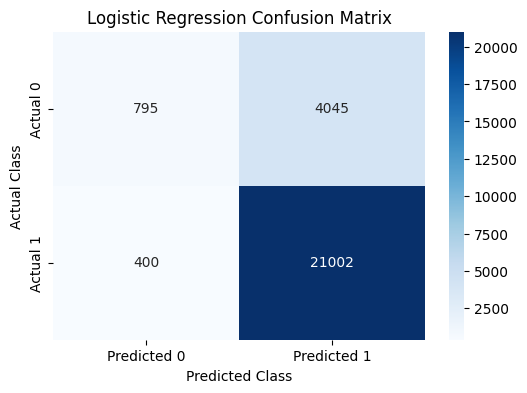


Logistic Regression Coefficients:
                     Feature  Coefficient  Abs_Coefficient
3         user_reorder_ratio    -4.050702         4.050702
2       user_avg_basket_size     0.133824         0.133824
1  user_avg_days_since_prior    -0.013036         0.013036
0          user_total_orders     0.000662         0.000662

(Positive coeff -> increases log-odds of class 1; Negative -> decreases)

Phase 5 Complete. Time taken: 0.19 seconds.
--------------------------------------------------


In [177]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report)
import matplotlib.pyplot as plt
import seaborn as sns
import time

print("--- Phase 5: Training and Evaluating Logistic Regression ---")
start_time = time.time()

# Ensure X_train, X_test, y_train, y_test exist from Phase 4

# 1. Initialize the Model
# Increased max_iter for potential convergence issues on larger data
# random_state for reproducibility
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# 2. Train the Model
log_reg_model.fit(X_train, y_train)
print("Model training complete.")

# 3. Make Predictions on the Test Set
y_pred_lr = log_reg_model.predict(X_test)
# Get probabilities for AUC calculation (probability of the positive class, 1)
y_pred_proba_lr = log_reg_model.predict_proba(X_test)[:, 1]
print("Predictions generated for the test set.")

# 4. Evaluate the Model
print("\n--- Logistic Regression Evaluation Metrics ---")
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr) # Defaults to positive class (1)
recall_lr = recall_score(y_test, y_pred_lr)       # Defaults to positive class (1)
f1_lr = f1_score(y_test, y_pred_lr)               # Defaults to positive class (1)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)

print(f"Accuracy:  {accuracy_lr:.4f}")
print(f"Precision (Class 1): {precision_lr:.4f}")
print(f"Recall (Class 1):    {recall_lr:.4f}")
print(f"F1-Score (Class 1):  {f1_lr:.4f}")
print(f"AUC-ROC:   {roc_auc_lr:.4f}")

# 5. Detailed Report per Class
print("\nClassification Report:")
# Use target_names for better readability if desired
print(classification_report(y_test, y_pred_lr, target_names=['Class 0 (No New)', 'Class 1 (New)']))

# 6. Confusion Matrix Visualization
print("\nConfusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# 7. Feature Importance (Coefficients)
print("\nLogistic Regression Coefficients:")
# Combine feature names with the learned coefficients
coefficients_lr = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg_model.coef_[0] # Coef_ is a 2D array for binary classification
})
# Add absolute value for sorting by magnitude
coefficients_lr['Abs_Coefficient'] = abs(coefficients_lr['Coefficient'])
coefficients_lr = coefficients_lr.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients_lr)
print("\n(Positive coeff -> increases log-odds of class 1; Negative -> decreases)")

end_time = time.time()
print(f"\nPhase 5 Complete. Time taken: {end_time - start_time:.2f} seconds.")
print("-" * 50)

### Analysis of Logistic Regression Results

The evaluation metrics for our baseline Logistic Regression model reveal several important points:

1.  **Overall Discriminatory Power (AUC-ROC = 0.7523):** The AUC score is significantly above 0.5, indicating that the model has a reasonable ability to differentiate between users who will buy a new product versus those who won't. It's performing much better than random chance.

2.  **High Accuracy, Misleading Picture (Accuracy = 0.8306):** While accuracy seems high, it's heavily influenced by the model correctly predicting the majority class (Class 1: New Product Purchased), which makes up ~81.6% of the data. It doesn't tell the full story about performance on both classes.

3.  **Performance on Majority Class (Class 1 - New):**
    *   The model achieves high Recall (0.9813) and good Precision (0.8385) for Class 1. This means it correctly identifies almost all users who *do* buy a new product, and when it predicts they will, it's often right. The F1-score (0.9043) reflects this strong performance.

4.  **Performance on Minority Class (Class 0 - No New):**
    *   **This is the main weakness.** The Recall for Class 0 is very low (0.16). This means the model only successfully identifies 16% of the users who *did not* buy a new product. It misses the vast majority (84%) of this group.
    *   The Precision for Class 0 (0.67) is better, meaning when it *does* predict Class 0, it's correct about two-thirds of the time. However, it makes this prediction very rarely due to the low recall.
    *   The resulting F1-score (0.26) is poor, highlighting the model's difficulty with this minority class.

5.  **Key Feature Insights (Coefficients):**
    *   The model heavily relies on `user_reorder_ratio` (coefficient -4.05). A higher historical reorder rate strongly predicts *against* buying a new product. This aligns perfectly with intuition.
    *   `user_avg_basket_size` has a moderate positive influence (coefficient 0.13), suggesting larger average orders are slightly associated with buying new products.
    *   The other features (`user_avg_days_since_prior`, `user_total_orders`) have a much smaller linear influence according to this model.

**Conclusion for Baseline:**

The Logistic Regression model provides a useful, interpretable baseline. It confirms the importance of historical reordering behavior. However, its practical value might be limited by its inability to effectively identify the smaller group of customers who stick only to familiar products (low recall for Class 0). This suggests room for improvement, potentially using models better suited to handling imbalance or capturing more complex relationships.

## Potential Next Steps

Based on these results, several avenues could be explored to potentially improve the model and gain further insights:

1.  **Try More Complex Models:** Algorithms like **Random Forest** or **XGBoost** might capture more complex patterns and interactions between features that Logistic Regression misses. They also have built-in mechanisms (like `class_weight` or `scale_pos_weight`) that could potentially handle the class imbalance more effectively and improve recall for the minority class.
2.  **More Feature Engineering:** Our current model only uses 4 basic features. Creating more features (e.g., related to purchase timing, category preferences, user tenure, characteristics of the *last* order) could provide the model with richer information and improve predictive power.
3.  **Hyperparameter Tuning:** The models (including Logistic Regression) have settings (hyperparameters) that we left at their defaults. Systematically testing different settings (e.g., using GridSearchCV) could optimize performance for our specific dataset and evaluation metric (like AUC or F1-score for Class 0).
4.  **Address Imbalance Differently:** Explore techniques like resampling (e.g., SMOTE to oversample the minority class or random undersampling of the majority class) during training, although careful evaluation is needed.
5.  **Interpretability vs. Performance:** Decide if the slightly lower interpretability of tree-based models (like RF/XGBoost) compared to Logistic Regression coefficients is an acceptable trade-off for potentially higher performance.

For this project's current scope, evaluating a more complex model like Random Forest or XGBoost (Option 1) would be a logical next step to see if we can improve upon this baseline, particularly for the minority class prediction.

### Trying a More Complex Model: Random Forest

Our baseline Logistic Regression model showed decent overall performance (AUC ~0.75) but struggled to identify the minority class (users *not* buying new products). Logistic Regression assumes linear relationships between features and the outcome's probability. Real-world behavior is often more complex.

To potentially capture non-linear patterns and interactions between our features, we'll now try a **Random Forest Classifier**.

**Why Random Forest?**
*   **Handles Non-Linearity:** It builds multiple decision trees, which can naturally model non-linear relationships (e.g., the effect of basket size might plateau).
*   **Captures Interactions:** By design, it considers how different features work together when making splits in the trees.
*   **Robustness:** Generally less sensitive to feature scaling and outliers compared to linear models.
*   **Imbalance Handling:** Includes options like `class_weight='balanced'` which explicitly tells the model to pay more attention to the minority class during training, potentially improving its recall.

We will train it on the same data and evaluate using the same metrics to directly compare its performance to the Logistic Regression baseline.

### A Note on Class Imbalance and `class_weight`

Looking back at our target variable distribution (Phase 2), we saw significant **class imbalance**:

*   Class 1 (Bought New Product): ~81.6%
*   Class 0 (Did Not Buy New Product): ~18.4%

**Why is this important?** Standard machine learning algorithms often aim to minimize the overall number of mistakes. With imbalanced data, a model can achieve high *overall accuracy* simply by mostly predicting the majority class (Class 1 in our case). This can result in a model that is poor at identifying the minority class (Class 0), which might be the group we are particularly interested in understanding or targeting differently. Our Logistic Regression results showed this exact issue (very low Recall for Class 0).

**How `class_weight` Helps:**
The `class_weight` parameter, available in many Scikit-learn models like `RandomForestClassifier`, allows us to address this. It adjusts how much the model gets "penalized" for making mistakes on different classes during training.

*   **`class_weight='balanced'`:** We will use this setting. It automatically assigns higher weights to the minority class (Class 0) and lower weights to the majority class (Class 1). The weights are inversely proportional to how frequent each class is.
*   **Effect:** This tells the algorithm: "Pay more attention to getting the Class 0 predictions correct, even if it means making slightly more errors on the common Class 1." This often helps to **improve the model's ability to identify the minority class (increasing Recall for Class 0)**, potentially at the cost of slightly lower overall accuracy or precision.

Using `class_weight='balanced'` is a common strategy to encourage models to learn more effectively from imbalanced datasets.


--- Phase 5b: Training and Evaluating Random Forest ---
Model training complete.
Predictions generated for the test set.

--- Random Forest Evaluation Metrics ---
Accuracy:  0.8113
Precision (Class 1): 0.8435
Recall (Class 1):    0.9437
F1-Score (Class 1):  0.8908
AUC-ROC:   0.7031

Classification Report:
                  precision    recall  f1-score   support

Class 0 (No New)       0.48      0.23      0.31      4840
   Class 1 (New)       0.84      0.94      0.89     21402

        accuracy                           0.81     26242
       macro avg       0.66      0.58      0.60     26242
    weighted avg       0.78      0.81      0.78     26242


Confusion Matrix:


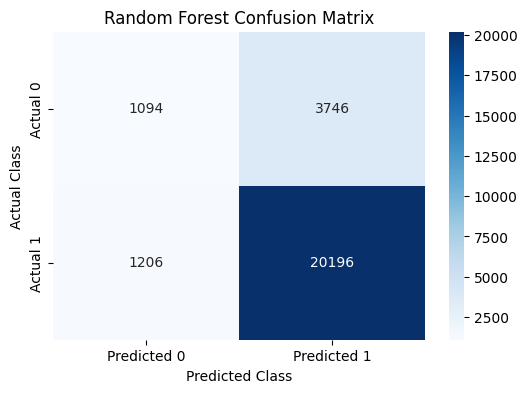


Random Forest Feature Importances:
                     Feature  Importance
3         user_reorder_ratio    0.312148
2       user_avg_basket_size    0.292730
1  user_avg_days_since_prior    0.271364
0          user_total_orders    0.123758


/var/folders/51/pys4jc71057cwt5cvjb3qqh80000gn/T/ipykernel_24688/385731411.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df, palette='viridis')


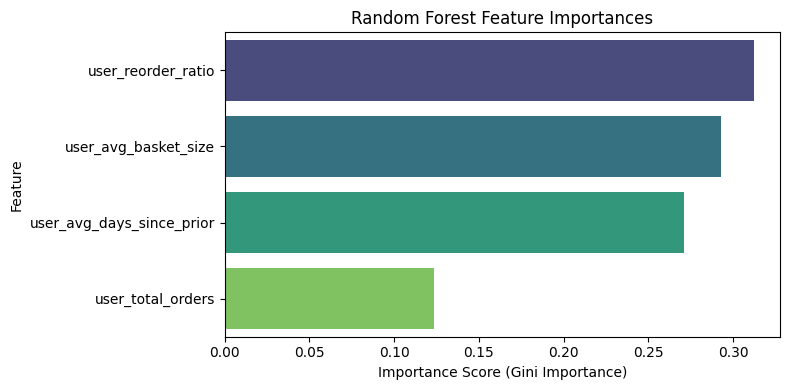


Phase 5b Complete. Time taken: 2.72 seconds.
--------------------------------------------------


In [178]:
from sklearn.ensemble import RandomForestClassifier
# Reuse metrics functions and plotting libraries imported earlier
# import time # Already imported if needed

print("\n--- Phase 5b: Training and Evaluating Random Forest ---")
start_time = time.time()

# 1. Initialize the Model
# n_estimators=100 is a common starting point
# class_weight='balanced' to help with imbalance
# n_jobs=-1 uses all available CPU cores for potentially faster training
# random_state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100,
                                  class_weight='balanced',
                                  random_state=42,
                                  n_jobs=-1)

# 2. Train the Model
rf_model.fit(X_train, y_train)
print("Model training complete.")

# 3. Make Predictions on the Test Set
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1] # Probabilities for AUC
print("Predictions generated for the test set.")

# 4. Evaluate the Model
print("\n--- Random Forest Evaluation Metrics ---")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf) # Class 1
recall_rf = recall_score(y_test, y_pred_rf)       # Class 1
f1_rf = f1_score(y_test, y_pred_rf)               # Class 1
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Accuracy:  {accuracy_rf:.4f}")
print(f"Precision (Class 1): {precision_rf:.4f}")
print(f"Recall (Class 1):    {recall_rf:.4f}")
print(f"F1-Score (Class 1):  {f1_rf:.4f}")
print(f"AUC-ROC:   {roc_auc_rf:.4f}")

# 5. Detailed Report per Class
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Class 0 (No New)', 'Class 1 (New)']))

# 6. Confusion Matrix Visualization
print("\nConfusion Matrix:")
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Random Forest Confusion Matrix')
plt.show()

# 7. Feature Importance
print("\nRandom Forest Feature Importances:")
importances_rf = rf_model.feature_importances_
feature_importance_rf_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)
print(feature_importance_rf_df)

# Plot feature importances
plt.figure(figsize=(8, 4)) # Adjusted size slightly
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf_df, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score (Gini Importance)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


end_time = time.time()
print(f"\nPhase 5b Complete. Time taken: {end_time - start_time:.2f} seconds.")
print("-" * 50)

### Analysis of Random Forest Results & Next Steps

We trained a Random Forest Classifier, using `class_weight='balanced'` to specifically address the poor performance on the minority class (Class 0 - No New Product) observed with Logistic Regression. Let's compare:

| Metric        | Logistic Regression | Random Forest (`balanced`) | Change vs LR |
| :------------ | :------------------ | :------------------------- | :----------- |
| **AUC-ROC**   | **0.7523**          | 0.7031                     | **Worse**    |
| Accuracy      | **0.8306**          | 0.8113                     | Worse        |
| Precision 0   | **0.67**            | 0.48                       | Worse        |
| **Recall 0**    | 0.16                | **0.23**                   | **Improved** |
| **F1-Score 0**  | 0.26                | **0.31**                   | **Improved** |
| Precision 1   | 0.8385              | **0.8435**                 | Improved     |
| Recall 1      | **0.9813**          | 0.9437                     | Worse        |
| F1-Score 1    | **0.9043**          | 0.8908                     | Worse        |

**Key Observations:**

1.  **Minority Class Improvement:** The Random Forest, aided by `class_weight='balanced'`, did successfully **improve Recall for Class 0** (from 0.16 to 0.23). It identified more of the users who *did not* buy new products. The F1-score for Class 0 also slightly increased.
2.  **Overall Performance Decline:** This improvement came at a cost. The **AUC dropped significantly** (from 0.7523 to 0.7031), indicating the model's overall ability to distinguish between the classes worsened. Accuracy and performance on the majority class (Class 1) also slightly decreased.
3.  **Feature Usage:** Random Forest seems to distribute importance more evenly across the top features (`user_reorder_ratio`, `user_avg_basket_size`, `user_avg_days_since_prior`) compared to Logistic Regression, suggesting it leverages them differently.

**Decision & Path Forward:**

While Random Forest addressed the specific goal of improving minority class recall, the drop in overall discriminatory power (AUC) is concerning. It suggests that simply applying a standard non-linear model with basic class weighting wasn't sufficient with our current features.

There are two primary paths forward:

*   **Path A: Try a Different Algorithm:** Explore another powerful algorithm like **XGBoost (Extreme Gradient Boosting)**. XGBoost often achieves state-of-the-art results on tabular data and handles feature interactions and non-linearities differently than Random Forest. It also has robust mechanisms for handling class imbalance (`scale_pos_weight`). We can see if it offers a better balance between overall performance (AUC) and minority class identification.
*   **Path B: More Feature Engineering:** Acknowledge that our current 4 features might be too simple. We could pause modeling and engineer more descriptive features (related to timing, categories, user tenure, etc.) hoping to provide *any* model with more signal to work with.

**Our Chosen Next Step: Try XGBoost (Path A)**

We will proceed with **Path A** for now and evaluate XGBoost. It represents a different type of gradient-boosted ensemble model and is worth testing before concluding that our features are insufficient.

*   **Rationale:** It's valuable to see if a different algorithmic approach can better utilize the existing features.
*   **Contingency:** If XGBoost *also* fails to significantly improve upon the Logistic Regression baseline (especially in AUC), it will strengthen the argument for needing **more feature engineering (Path B)** as the most critical next step.

We will now train and evaluate an XGBoost model, again using appropriate methods to handle class imbalance.

### Trying Another Advanced Model: XGBoost

Following our analysis, the Random Forest model improved minority class recall but decreased overall performance (AUC) compared to the Logistic Regression baseline. Before concluding that we need more features, we'll try one more advanced algorithm: **XGBoost (Extreme Gradient Boosting)**.

**Why XGBoost?**
*   **Different Ensemble Method:** While also using decision trees, XGBoost builds them sequentially. Each new tree tries to correct the errors made by the previous ones (this is "boosting"). This often leads to highly accurate models.
*   **Regularization:** XGBoost includes built-in regularization techniques (L1 and L2) which help prevent overfitting, potentially leading to better generalization than a standard Random Forest on some datasets.
*   **Efficiency:** It's known for its computational efficiency and speed, often leveraging optimized algorithms and parallel processing well.
*   **Imbalance Handling:** Like Random Forest, it can handle imbalance. We will use its specific parameter `scale_pos_weight` which adjusts the weight given to the positive class errors (calculated based on the ratio of negative to positive samples).

By comparing XGBoost's results to both Logistic Regression and Random Forest, we'll get a clearer picture of whether algorithmic changes alone can significantly improve performance with our current features.


--- Phase 5c: Training and Evaluating XGBoost ---
Calculated scale_pos_weight for XGBoost: 0.2262


/Users/chidiogoonoh/Projects/kaggle/instacart/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:20:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.
Predictions generated for the test set.

--- XGBoost Evaluation Metrics ---
Accuracy:  0.7123
Precision (Class 1): 0.9001
Recall (Class 1):    0.7280
F1-Score (Class 1):  0.8049
AUC-ROC:   0.7483

Classification Report:
                  precision    recall  f1-score   support

Class 0 (No New)       0.35      0.64      0.45      4840
   Class 1 (New)       0.90      0.73      0.80     21402

        accuracy                           0.71     26242
       macro avg       0.62      0.69      0.63     26242
    weighted avg       0.80      0.71      0.74     26242


Confusion Matrix:


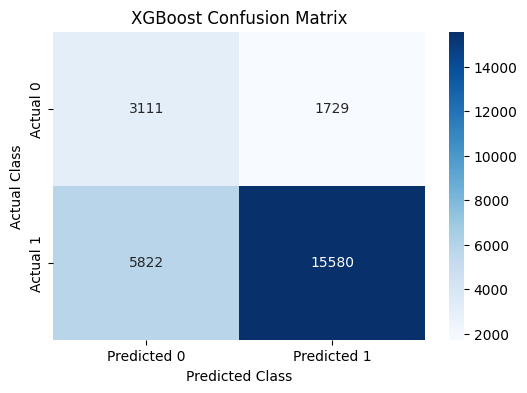


XGBoost Feature Importances:
                     Feature  Importance
3         user_reorder_ratio    0.447581
2       user_avg_basket_size    0.379399
1  user_avg_days_since_prior    0.091910
0          user_total_orders    0.081111


/var/folders/51/pys4jc71057cwt5cvjb3qqh80000gn/T/ipykernel_24688/474400521.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb_df, palette='viridis')


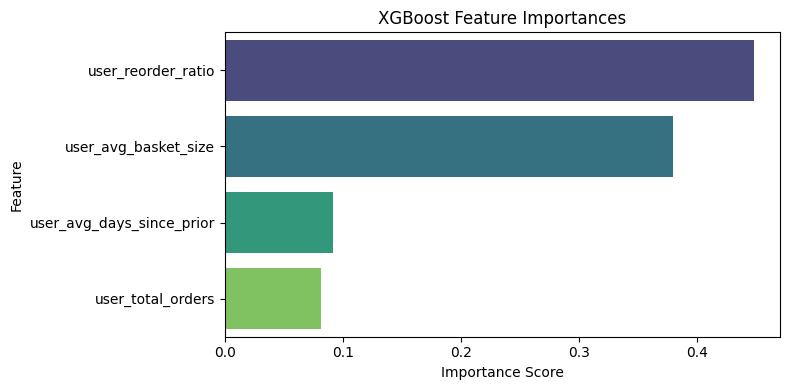


Phase 5c Complete. Time taken: 0.43 seconds.
--------------------------------------------------


In [179]:
import xgboost as xgb # Conventionally imported as xgb
# Reuse metrics functions and plotting libraries imported earlier
# import time # Already imported if needed

print("\n--- Phase 5c: Training and Evaluating XGBoost ---")
start_time = time.time()

# Ensure X_train, y_train, etc. exist from Phase 4

# 1. Calculate scale_pos_weight for imbalance handling
# scale_pos_weight = count(negative samples) / count(positive samples)
count_neg = y_train.value_counts()[0]
count_pos = y_train.value_counts()[1]
# Handle potential edge case of count_pos being 0 (though impossible here)
scale_pos_weight_value = count_neg / count_pos if count_pos > 0 else 1
print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight_value:.4f}")

# 2. Initialize the XGBoost classifier
# objective='binary:logistic': for binary classification, outputs probabilities
# eval_metric='logloss': common evaluation metric for logistic objectives
# use_label_encoder=False: Avoids a potential warning
# n_estimators=100: Number of boosting rounds (trees) - can be tuned
# scale_pos_weight: handles class imbalance using the calculated value
# random_state for reproducibility
# n_jobs for parallelization (often defaults to using available cores)
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                              eval_metric='logloss',
                              use_label_encoder=False,
                              n_estimators=100,
                              scale_pos_weight=scale_pos_weight_value,
                              random_state=42,
                              n_jobs=-1)

# 3. Train the model
xgb_model.fit(X_train, y_train)
print("Model training complete.")

# 4. Make Predictions on the Test Set
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1] # Probabilities for AUC
print("Predictions generated for the test set.")

# 5. Evaluate the Model
print("\n--- XGBoost Evaluation Metrics ---")
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb) # Class 1
recall_xgb = recall_score(y_test, y_pred_xgb)       # Class 1
f1_xgb = f1_score(y_test, y_pred_xgb)               # Class 1
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"Accuracy:  {accuracy_xgb:.4f}")
print(f"Precision (Class 1): {precision_xgb:.4f}")
print(f"Recall (Class 1):    {recall_xgb:.4f}")
print(f"F1-Score (Class 1):  {f1_xgb:.4f}")
print(f"AUC-ROC:   {roc_auc_xgb:.4f}")

# 6. Detailed Report per Class
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Class 0 (No New)', 'Class 1 (New)']))

# 7. Confusion Matrix Visualization
print("\nConfusion Matrix:")
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('XGBoost Confusion Matrix')
plt.show()

# 8. Feature Importance
print("\nXGBoost Feature Importances:")
# Uses the default importance type (often 'weight' or similar)
importances_xgb = xgb_model.feature_importances_
feature_importance_xgb_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False)
print(feature_importance_xgb_df)

# Plot feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb_df, palette='viridis')
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance Score') # Default type varies, might be F-score, Gain, etc.
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

end_time = time.time()
print(f"\nPhase 5c Complete. Time taken: {end_time - start_time:.2f} seconds.")
print("-" * 50)

### Analysis of XGBoost Results & Model Comparison

We trained an XGBoost classifier, using `scale_pos_weight` to handle the class imbalance. Here's how it performed compared to Logistic Regression and Random Forest:

| Metric        | Logistic Regression | Random Forest (`balanced`) | XGBoost (`scale_pos_weight`) |
| :------------ | :------------------ | :------------------------- | :------------------------- |
| **AUC-ROC**   | **0.7523**          | 0.7031                     | 0.7483                     |
| Accuracy      | **0.8306**          | 0.8113                     | 0.7123                     |
| Precision 0   | **0.67**            | 0.48                       | 0.35                       |
| **Recall 0**    | 0.16                | 0.23                       | **0.64**                   |
| **F1-Score 0**  | 0.26                | 0.31                       | **0.45**                   |
| Precision 1   | 0.8385              | 0.8435                     | **0.9001**                 |
| Recall 1      | **0.9813**          | 0.9437                     | 0.7280                     |
| F1-Score 1    | **0.9043**          | 0.8908                     | 0.8049                     |

**Key Observations for XGBoost:**

1.  **Minority Class Identification:** XGBoost achieved **by far the highest Recall (0.64) and F1-Score (0.45) for Class 0 (No New Product)**. Using `scale_pos_weight` was very effective in forcing the model to identify a majority (64%) of these difficult-to-find users.
2.  **Trade-off:** This came at the cost of significantly lower Recall (0.7280) for the majority Class 1 compared to the other models. Precision for Class 0 was also the lowest (0.35), meaning many of its Class 0 predictions were incorrect (False Positives). Overall accuracy (0.7123) was the lowest due to the shift in focus towards Class 0.
3.  **AUC Performance:** XGBoost's AUC (0.7483) is very close to Logistic Regression's (0.7523) and much better than Random Forest's (0.7031). This suggests its overall ability to rank users correctly is competitive with the baseline linear model, despite its very different internal mechanics and class performance balance.
4.  **Feature Importance:** Similar to the other models, `user_reorder_ratio` and `user_avg_basket_size` are overwhelmingly the most important features. XGBoost relies even more heavily on these top two compared to Random Forest.

**Overall Comparison & Path Forward:**

*   **No Single Best:** None of the models is universally superior across all metrics.
    *   **Logistic Regression:** Offers the best AUC (slightly) and balanced performance *for the majority class*. It's simple and interpretable but fails on minority recall.
    *   **Random Forest:** In this configuration, it underperformed on AUC and didn't offer compelling advantages.
    *   **XGBoost:** Provides the best performance by far on the **minority class (Recall 0, F1 0)**, making it potentially valuable if identifying users who *don't* try new things is a key goal. Its AUC is competitive with Logistic Regression.
*   **The Feature Ceiling:** The fact that neither RF nor XGBoost significantly surpassed the baseline Logistic Regression's AUC, despite their ability to model complexity, **strongly suggests that we may be limited by our current set of 4 features.** They might not contain enough predictive signal to push performance much higher, regardless of the algorithm.

**Decision & Recommended Next Step:**

Given these findings, the most promising path to achieving a potentially *significant* improvement and building a more impressive project is likely **Phase 3b: More Feature Engineering**.

*   **Rationale:** Adding more diverse and informative features (e.g., related to timing, user tenure, category affinities) has a high potential to boost the performance of *all* model types, potentially lifting the AUC ceiling we seem to be hitting.
*   **Plan:** We will go back and create a richer set of features based on the user's prior history. Afterwards, we can retrain and re-evaluate our models (perhaps focusing on Logistic Regression and XGBoost, as they showed the most promise in different areas) on this expanded feature set. This iterative process of feature engineering and modeling is central to practical machine learning.

We will now proceed to define and calculate additional features.

# Phase 3b: More Feature Engineering

Our initial modeling showed that while algorithms handle the data differently, performance (especially AUC) didn't dramatically improve beyond the baseline. This strongly suggests our initial 4 features might not be capturing enough complexity about user behavior.

Therefore, we will now engineer additional features based on users' `'prior'` order history to provide richer information to the models.

**New Feature Categories:**

1.  **User Timing Patterns:** Look more closely at *when* users shop.
    *   `user_median_days_since_prior`: Median days between orders (more robust to outliers than the average).
    *   `user_std_days_since_prior`: Standard deviation of days between orders (measures consistency of timing).
    *   `user_most_frequent_dow`: Most common day of the week for orders.
    *   `user_most_frequent_hour`: Most common hour of the day for orders.
2.  **User Product Diversity:** Measure the variety of products purchased.
    *   `user_total_departments`: Number of distinct departments purchased from.
    *   `user_total_aisles`: Number of distinct aisles purchased from.
    *   `user_avg_unique_prods_per_order`: Average number of *unique* products per order basket.
3.  **User Reorder Details:** Add more context to reordering.
    *   `user_total_items_purchased`: Total number of items (lines in order_products) across all prior orders.
    *   `user_reorder_sum`: Total count of items flagged as 'reordered' across all prior orders.

We will calculate these and add them to our existing `features_df`.

In [180]:
import pandas as pd
import numpy as np
import gc
import time

print("--- Phase 3b: Calculating Additional Features ---")
start_time = time.time()

# ASSUMPTION: The following DataFrames exist in memory from previous cells:
# - features_df (from original Phase 3)
# - final_target_df (from Phase 2)
# - orders_df, order_products_prior_df, products_df (from Phase 0)

# We will proceed directly. If a required DataFrame is missing,
# the code will raise a NameError where it's first used.

target_users = final_target_df['user_id'].unique()

# --- Regenerate necessary intermediate DFs for this scope ---
# print("Filtering prior orders and products for target users...") # Optional print
orders_prior_filtered_df = orders_df[
    (orders_df['user_id'].isin(target_users)) &
    (orders_df['eval_set'] == 'prior')
].copy()

order_products_prior_filtered_df = orders_prior_filtered_df[['order_id', 'user_id']].merge(
    order_products_prior_df[['order_id', 'product_id', 'reordered']],
    on='order_id',
    how='inner'
)

# Ensure products_df is available before merging
if 'products_df' not in locals() or products_df.empty:
     raise NameError("ERROR: `products_df` is not loaded or empty. Please run Phase 0.")

order_products_details_filtered_df = order_products_prior_filtered_df.merge(
    products_df[['product_id', 'aisle_id', 'department_id']],
    on='product_id',
    how='left'
)
# print("Intermediate data prepared.") # Optional print

# --- Calculate New Features ---
# print("Calculating new user-level features...") # Optional print

# 1. User Timing Patterns
user_timing_agg = orders_prior_filtered_df.groupby('user_id').agg(
    user_median_days_since_prior=('days_since_prior_order', 'median'),
    user_std_days_since_prior=('days_since_prior_order', 'std'),
    user_most_frequent_dow=('order_dow', lambda x: x.mode()[0] if not x.mode().empty else -1),
    user_most_frequent_hour=('order_hour_of_day', lambda x: x.mode()[0] if not x.mode().empty else -1)
).reset_index()
# Use .loc to avoid SettingWithCopyWarning if possible, or assign back
user_timing_agg.loc[user_timing_agg['user_std_days_since_prior'].isnull(), 'user_std_days_since_prior'] = 0
user_timing_agg.loc[user_timing_agg['user_median_days_since_prior'].isnull(), 'user_median_days_since_prior'] = 0

# 2. User Product Diversity
user_diversity_agg = order_products_details_filtered_df.groupby('user_id').agg(
    user_total_departments=('department_id', 'nunique'),
    user_total_aisles=('aisle_id', 'nunique')
).reset_index()

# Avg unique products per order
unique_prods_per_order = order_products_prior_filtered_df.groupby(['user_id', 'order_id'])['product_id'].nunique().reset_index(name='unique_prods')
user_avg_unique_prods = unique_prods_per_order.groupby('user_id')['unique_prods'].mean().reset_index()
user_avg_unique_prods.rename(columns={'unique_prods': 'user_avg_unique_prods_per_order'}, inplace=True)

# 3. User Reorder Details (Additional)
user_reorder_details_agg = order_products_prior_filtered_df.groupby('user_id').agg(
    user_total_items_purchased=('product_id', 'count'),
    user_reorder_sum=('reordered', 'sum')
).reset_index()

# --- Combine New Features with Existing `features_df` ---
# print("Merging new features into features_df...") # Optional print

# Ensure the initial features_df exists
if 'features_df' not in locals():
    raise NameError("ERROR: The initial `features_df` from Phase 3 was not found. Please run Phase 3.")

features_df = features_df.merge(user_timing_agg, on='user_id', how='left')
features_df = features_df.merge(user_diversity_agg, on='user_id', how='left')
features_df = features_df.merge(user_avg_unique_prods, on='user_id', how='left')
features_df = features_df.merge(user_reorder_details_agg, on='user_id', how='left')

# Check for NaNs again after merging new features
print("\nChecking for missing values in *updated* features_df:")
new_cols = ['user_median_days_since_prior', 'user_std_days_since_prior',
            'user_most_frequent_dow', 'user_most_frequent_hour',
            'user_total_departments', 'user_total_aisles',
            'user_avg_unique_prods_per_order', 'user_total_items_purchased',
            'user_reorder_sum']
# Check only columns expected to be added or potentially affected by merges
check_cols = [col for col in new_cols if col in features_df.columns]
if check_cols:
    print(features_df[check_cols].isnull().sum())
else:
    print("No new columns found to check for NaNs.")
# Optional: Fill any potential NaNs
# features_df.fillna(0, inplace=True) # Example fill

# Clean up intermediate DFs for this phase
del orders_prior_filtered_df
del order_products_prior_filtered_df
del order_products_details_filtered_df
del user_timing_agg
del user_diversity_agg
del unique_prods_per_order
del user_avg_unique_prods
del user_reorder_details_agg
gc.collect()

end_time = time.time()
print(f"\nAdditional Feature Calculation Complete. Time taken: {end_time - start_time:.2f} seconds.")
print("\nUpdated Features DataFrame (`features_df`) Head:")
print(features_df.head())
print(f"\nUpdated Features DataFrame Shape: {features_df.shape}")
print("\nUpdated Feature List:")
print(features_df.columns.tolist())
print("-" * 50)

--- Phase 3b: Calculating Additional Features ---

Checking for missing values in *updated* features_df:
user_median_days_since_prior       0
user_std_days_since_prior          0
user_most_frequent_dow             0
user_most_frequent_hour            0
user_total_departments             0
user_total_aisles                  0
user_avg_unique_prods_per_order    0
user_total_items_purchased         0
user_reorder_sum                   0
dtype: int64

Additional Feature Calculation Complete. Time taken: 22.36 seconds.

Updated Features DataFrame (`features_df`) Head:
   user_id  user_total_orders  user_avg_days_since_prior  \
0        1                 10                  19.555555   
1        2                 14                  15.230769   
2        5                  4                  13.333333   
3        7                 20                  10.684211   
4        8                  3                  30.000000   

   user_avg_basket_size  user_reorder_ratio  user_median_days_since_p

# Phase 4 (Repeated): Preparing Updated Data for Modeling

We have successfully engineered additional features, expanding our `features_df` from 4 features to 13.

Now, we need to repeat the data preparation steps using this **updated feature set**:

1.  **Merging:** Combine the *new* `features_df` (with 13 features) and the `final_target_df` (target variable).
2.  **Splitting:** Divide this updated combined dataset into new Training and Testing sets (`X_train`, `X_test`, `y_train`, `y_test`). We will use the same `test_size` (20%) and `random_state` (42) as before for consistency and comparability, and crucially, continue to `stratify` by the target variable `y`.

This will give us the necessary inputs, now based on the richer feature set, for retraining our models.

In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split

print("--- Phase 4 (Repeated): Preparing Updated Data for Modeling ---")

# 1. Merge Updated Features and Target
# Ensure both final_target_df and the *updated* features_df exist
if 'final_target_df' in locals() and 'features_df' in locals():
    # The current features_df in memory is the updated one
    model_data_df_updated = pd.merge(features_df, final_target_df, on='user_id', how='inner')
    print(f"Merged updated data shape: {model_data_df_updated.shape}") # Should have 13 features + user_id + target

    # Separate features (X) and target (y) using the updated data
    X_updated = model_data_df_updated.drop(columns=['user_id', 'new_product_purchased'])
    y_updated = model_data_df_updated['new_product_purchased'] # Target remains the same

    # Get the updated feature names
    feature_names_updated = X_updated.columns.tolist()

    print(f"Updated Features (X_updated) shape: {X_updated.shape}") # Should have 13 columns
    print(f"Target (y_updated) shape: {y_updated.shape}")
    print(f"Updated Features used for modeling: {feature_names_updated}")

    # 2. Split Data into Training and Testing Sets (Stratified)
    # Use the same parameters as before for consistency
    test_set_size = 0.20
    reproducible_state = 42

    X_train_upd, X_test_upd, y_train_upd, y_test_upd = train_test_split(
        X_updated,
        y_updated,
        test_size=test_set_size,
        random_state=reproducible_state,
        stratify=y_updated # Stratify based on the same target
    )

    print("\nData Splitting Complete with Updated Features.")
    print(f"X_train_upd shape: {X_train_upd.shape}")
    print(f"X_test_upd shape: {X_test_upd.shape}")
    print("\nTraining set target distribution (y_train_upd):")
    print(y_train_upd.value_counts(normalize=True))
    print("\nTesting set target distribution (y_test_upd):")
    print(y_test_upd.value_counts(normalize=True))
    print("-" * 50)

else:
    print("ERROR: `final_target_df` or updated `features_df` not found. Cannot proceed.")

--- Phase 4 (Repeated): Preparing Updated Data for Modeling ---
Merged updated data shape: (131209, 15)
Updated Features (X_updated) shape: (131209, 13)
Target (y_updated) shape: (131209,)
Updated Features used for modeling: ['user_total_orders', 'user_avg_days_since_prior', 'user_avg_basket_size', 'user_reorder_ratio', 'user_median_days_since_prior', 'user_std_days_since_prior', 'user_most_frequent_dow', 'user_most_frequent_hour', 'user_total_departments', 'user_total_aisles', 'user_avg_unique_prods_per_order', 'user_total_items_purchased', 'user_reorder_sum']

Data Splitting Complete with Updated Features.
X_train_upd shape: (104967, 13)
X_test_upd shape: (26242, 13)

Training set target distribution (y_train_upd):
new_product_purchased
1    0.815552
0    0.184448
Name: proportion, dtype: float64

Testing set target distribution (y_test_upd):
new_product_purchased
1    0.815563
0    0.184437
Name: proportion, dtype: float64
--------------------------------------------------


# Phase 5 (Repeated): Evaluating Models with Updated Features

Now that we have engineered a richer set of 13 features, we will retrain and re-evaluate our models to see if the additional information improves predictive performance.

We'll start again with our baseline: **Logistic Regression**. We use the *exact same* modeling code but train and test it on the new data splits (`X_train_upd`, `y_train_upd`, `X_test_upd`, `y_test_upd`) derived from the expanded feature set. We will compare the results directly to the previous Phase 5 results (which used only 4 features).

--- Phase 5 (Repeated): Retraining Logistic Regression ---
Model training complete.
Predictions generated for the test set.

--- Logistic Regression Evaluation Metrics (Updated Features) ---
Accuracy:  0.8308
Precision (Class 1): 0.8409
Recall (Class 1):    0.9775
F1-Score (Class 1):  0.9041
AUC-ROC:   0.7580

Classification Report:
                  precision    recall  f1-score   support

Class 0 (No New)       0.65      0.18      0.28      4840
   Class 1 (New)       0.84      0.98      0.90     21402

        accuracy                           0.83     26242
       macro avg       0.74      0.58      0.59     26242
    weighted avg       0.81      0.83      0.79     26242


Confusion Matrix:


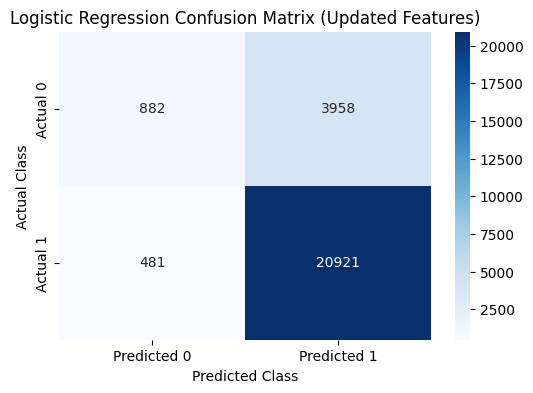


Logistic Regression Coefficients (Updated Features):
                            Feature  Coefficient  Abs_Coefficient
3                user_reorder_ratio    -3.457784         3.457784
8            user_total_departments     0.054213         0.054213
2              user_avg_basket_size     0.048707         0.048707
10  user_avg_unique_prods_per_order     0.048707         0.048707
6            user_most_frequent_dow    -0.011358         0.011358
5         user_std_days_since_prior     0.006855         0.006855
9                 user_total_aisles     0.005224         0.005224
0                 user_total_orders    -0.005123         0.005123
7           user_most_frequent_hour     0.003547         0.003547
1         user_avg_days_since_prior    -0.003177         0.003177
12                 user_reorder_sum    -0.002919         0.002919
11       user_total_items_purchased     0.001947         0.001947
4      user_median_days_since_prior    -0.001787         0.001787

Phase 5 (Repeated) - 

In [182]:
# Reuse previously imported libraries
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import ...
# import time

print("--- Phase 5 (Repeated): Retraining Logistic Regression ---")
start_time = time.time()

# Use the UPDATED training and testing sets
X_train_to_use = X_train_upd
y_train_to_use = y_train_upd
X_test_to_use = X_test_upd
y_test_to_use = y_test_upd
feature_names_to_use = feature_names_updated # Use the updated list of names

# 1. Initialize the Model
log_reg_model_upd = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter just in case

# 2. Train the Model
log_reg_model_upd.fit(X_train_to_use, y_train_to_use)
print("Model training complete.")

# 3. Make Predictions on the Test Set
y_pred_lr_upd = log_reg_model_upd.predict(X_test_to_use)
y_pred_proba_lr_upd = log_reg_model_upd.predict_proba(X_test_to_use)[:, 1]
print("Predictions generated for the test set.")

# 4. Evaluate the Model
print("\n--- Logistic Regression Evaluation Metrics (Updated Features) ---")
accuracy_lr_upd = accuracy_score(y_test_to_use, y_pred_lr_upd)
precision_lr_upd = precision_score(y_test_to_use, y_pred_lr_upd)
recall_lr_upd = recall_score(y_test_to_use, y_pred_lr_upd)
f1_lr_upd = f1_score(y_test_to_use, y_pred_lr_upd)
roc_auc_lr_upd = roc_auc_score(y_test_to_use, y_pred_proba_lr_upd)

print(f"Accuracy:  {accuracy_lr_upd:.4f}")
print(f"Precision (Class 1): {precision_lr_upd:.4f}")
print(f"Recall (Class 1):    {recall_lr_upd:.4f}")
print(f"F1-Score (Class 1):  {f1_lr_upd:.4f}")
print(f"AUC-ROC:   {roc_auc_lr_upd:.4f}")

# 5. Detailed Report per Class
print("\nClassification Report:")
print(classification_report(y_test_to_use, y_pred_lr_upd, target_names=['Class 0 (No New)', 'Class 1 (New)']))

# 6. Confusion Matrix Visualization
print("\nConfusion Matrix:")
cm_lr_upd = confusion_matrix(y_test_to_use, y_pred_lr_upd)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr_upd, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Logistic Regression Confusion Matrix (Updated Features)')
plt.show()

# 7. Feature Importance (Coefficients)
print("\nLogistic Regression Coefficients (Updated Features):")
coefficients_lr_upd = pd.DataFrame({
    'Feature': feature_names_to_use, # Use updated feature names
    'Coefficient': log_reg_model_upd.coef_[0]
})
coefficients_lr_upd['Abs_Coefficient'] = abs(coefficients_lr_upd['Coefficient'])
coefficients_lr_upd = coefficients_lr_upd.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients_lr_upd)

end_time = time.time()
print(f"\nPhase 5 (Repeated) - Logistic Regression Complete. Time taken: {end_time - start_time:.2f} seconds.")
print("-" * 50)

### Analysis: Logistic Regression with Updated Features

We retrained the Logistic Regression model using the expanded set of 13 features. Let's compare the key metrics to the baseline model which used only 4 features:

| Metric        | LR (4 Features) | LR (13 Features) | Change        |
| :------------ | :-------------- | :--------------- | :------------ |
| **AUC-ROC**   | 0.7523          | **0.7580**       | **Improved**  |
| Accuracy      | 0.8306          | **0.8308**       | Marginal Imp. |
| Precision 0   | 0.67            | 0.65             | Worse         |
| **Recall 0**    | 0.16            | **0.18**         | **Improved**  |
| **F1-Score 0**  | 0.26            | **0.28**         | **Improved**  |
| Precision 1   | 0.8385          | **0.8409**       | Improved      |
| Recall 1      | **0.9813**      | 0.9775           | Worse         |
| F1-Score 1    | **0.9043**      | 0.9041           | Marginal Dec. |

**Key Observations:**

1.  **AUC Improvement:** The AUC-ROC score **improved slightly** from 0.7523 to 0.7580. This indicates the additional features provided *some* extra signal that helps the model better distinguish between the classes overall.
2.  **Minority Class Improvement:** The **Recall for Class 0 improved** from 0.16 to 0.18, and the corresponding F1-score improved from 0.26 to 0.28. While still very low, the model is identifying slightly more of the users who *don't* buy new products. This is a positive sign.
3.  **Other Metrics:** Changes in Accuracy, Precision (Class 1), and F1-score (Class 1) were marginal. There was a slight decrease in Recall for Class 1, likely a consequence of the model trying slightly harder to identify Class 0.
4.  **Updated Feature Importance (Coefficients):**
    *   `user_reorder_ratio` remains the most dominant feature, although its absolute coefficient decreased (-3.46 vs -4.05), suggesting its influence is shared slightly more with other features now.
    *   New features like `user_total_departments` (positive coef: higher variety -> more likely new purchase?), `user_avg_unique_prods_per_order` (positive), and `user_most_frequent_dow` (negative?) now appear among the more influential features, although their coefficients are much smaller than `user_reorder_ratio`.
    *   The coefficients for the original features (`user_avg_basket_size`, `user_avg_days_since_prior`, `user_total_orders`) have changed slightly, reflecting the presence of the new variables in the model.

**Conclusion:**

Adding the extra features provided a **modest but measurable improvement** to the Logistic Regression model, primarily seen in the slight increase in AUC and the slightly better identification of the minority class (Recall 0 and F1 0). The model is leveraging some of the new information.

However, the core challenge remains: **Recall for Class 0 is still very low (0.18).**

**Next Step:** Since the added features provided *some* benefit, it's worth seeing how a more complex model like **XGBoost** performs with this richer feature set. XGBoost might be better equipped to exploit subtle patterns and interactions within these 13 features, potentially leading to a more significant improvement, especially for the minority class.

We will now retrain and evaluate XGBoost using the updated features (`X_train_upd`, `y_train_upd`, etc.).

### Retraining XGBoost with Updated Features

The updated features provided a slight boost to the Logistic Regression model, particularly improving the AUC and the minority class recall a little.

Now, let's see if **XGBoost**, which previously showed the best performance on the minority class (Class 0) with the original 4 features, can leverage this richer set of 13 features more effectively. We hypothesize that XGBoost's ability to model non-linearities and feature interactions might lead to more significant gains with the expanded feature set compared to Logistic Regression.

We will use the same XGBoost setup as before (including `scale_pos_weight` for imbalance) but train and test on the updated data splits (`X_train_upd`, `y_train_upd`, `X_test_upd`, `y_test_upd`).


--- Phase 5 (Repeated): Retraining XGBoost ---


/Users/chidiogoonoh/Projects/kaggle/instacart/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:20:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.
Predictions generated for the test set.

--- XGBoost Evaluation Metrics (Updated Features) ---
Accuracy:  0.7134
Precision (Class 1): 0.8983
Recall (Class 1):    0.7314
F1-Score (Class 1):  0.8063
AUC-ROC:   0.7458

Classification Report:
                  precision    recall  f1-score   support

Class 0 (No New)       0.35      0.63      0.45      4840
   Class 1 (New)       0.90      0.73      0.81     21402

        accuracy                           0.71     26242
       macro avg       0.62      0.68      0.63     26242
    weighted avg       0.80      0.71      0.74     26242


Confusion Matrix:


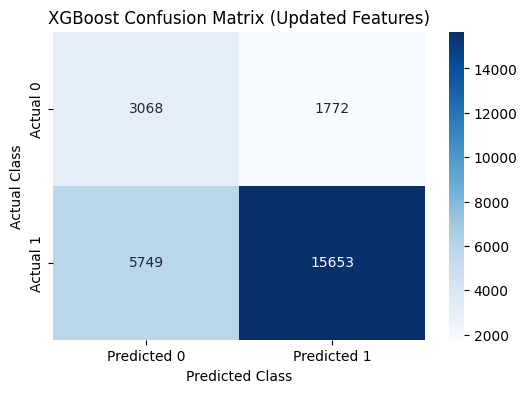


XGBoost Feature Importances (Updated Features):
                            Feature  Importance
3                user_reorder_ratio    0.305692
2              user_avg_basket_size    0.261263
8            user_total_departments    0.050797
9                 user_total_aisles    0.047262
4      user_median_days_since_prior    0.046843
11       user_total_items_purchased    0.044167
12                 user_reorder_sum    0.043265
5         user_std_days_since_prior    0.042455
1         user_avg_days_since_prior    0.042424
7           user_most_frequent_hour    0.039644
0                 user_total_orders    0.038633
6            user_most_frequent_dow    0.037555
10  user_avg_unique_prods_per_order    0.000000


/var/folders/51/pys4jc71057cwt5cvjb3qqh80000gn/T/ipykernel_24688/321611299.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb_upd_df, palette='viridis')


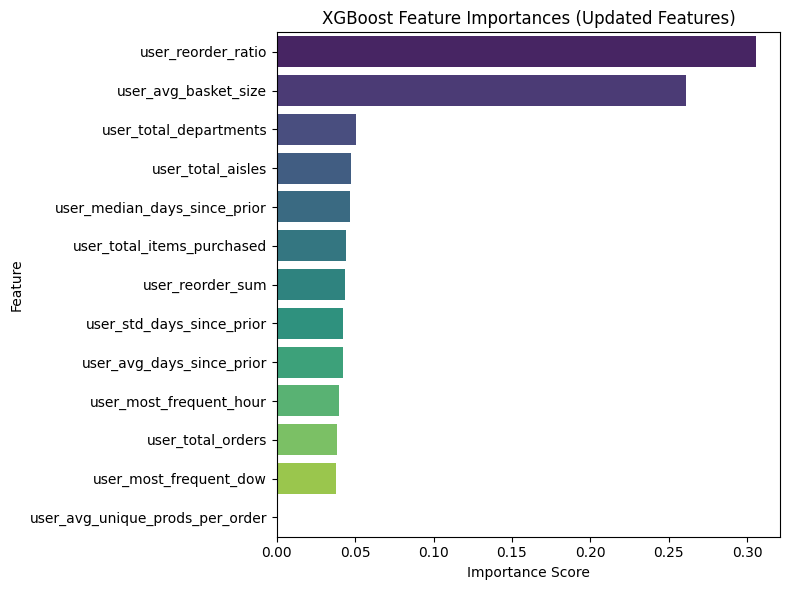


Phase 5 (Repeated) - XGBoost Complete. Time taken: 0.53 seconds.
--------------------------------------------------


In [183]:
# Reuse previously imported libraries
# import xgboost as xgb
# from sklearn.metrics import ...
# import time

print("\n--- Phase 5 (Repeated): Retraining XGBoost ---")
start_time = time.time()

# Use the UPDATED training and testing sets
X_train_to_use = X_train_upd
y_train_to_use = y_train_upd
X_test_to_use = X_test_upd
y_test_to_use = y_test_upd
feature_names_to_use = feature_names_updated # Use the updated list of names

# 1. Recalculate scale_pos_weight based on the updated training split y_train_upd
count_neg_upd = y_train_to_use.value_counts()[0]
count_pos_upd = y_train_to_use.value_counts()[1]
scale_pos_weight_value_upd = count_neg_upd / count_pos_upd if count_pos_upd > 0 else 1
# No need to print this again unless debugging

# 2. Initialize the XGBoost classifier
xgb_model_upd = xgb.XGBClassifier(objective='binary:logistic',
                                  eval_metric='logloss',
                                  use_label_encoder=False,
                                  n_estimators=100,
                                  scale_pos_weight=scale_pos_weight_value_upd, # Use weight calculated on y_train_upd
                                  random_state=42,
                                  n_jobs=-1)

# 3. Train the model
xgb_model_upd.fit(X_train_to_use, y_train_to_use)
print("Model training complete.")

# 4. Make Predictions on the Test Set
y_pred_xgb_upd = xgb_model_upd.predict(X_test_to_use)
y_pred_proba_xgb_upd = xgb_model_upd.predict_proba(X_test_to_use)[:, 1] # Probabilities for AUC
print("Predictions generated for the test set.")

# 5. Evaluate the Model
print("\n--- XGBoost Evaluation Metrics (Updated Features) ---")
accuracy_xgb_upd = accuracy_score(y_test_to_use, y_pred_xgb_upd)
precision_xgb_upd = precision_score(y_test_to_use, y_pred_xgb_upd) # Class 1
recall_xgb_upd = recall_score(y_test_to_use, y_pred_xgb_upd)       # Class 1
f1_xgb_upd = f1_score(y_test_to_use, y_pred_xgb_upd)               # Class 1
roc_auc_xgb_upd = roc_auc_score(y_test_to_use, y_pred_proba_xgb_upd)

print(f"Accuracy:  {accuracy_xgb_upd:.4f}")
print(f"Precision (Class 1): {precision_xgb_upd:.4f}")
print(f"Recall (Class 1):    {recall_xgb_upd:.4f}")
print(f"F1-Score (Class 1):  {f1_xgb_upd:.4f}")
print(f"AUC-ROC:   {roc_auc_xgb_upd:.4f}")

# 6. Detailed Report per Class
print("\nClassification Report:")
print(classification_report(y_test_to_use, y_pred_xgb_upd, target_names=['Class 0 (No New)', 'Class 1 (New)']))

# 7. Confusion Matrix Visualization
print("\nConfusion Matrix:")
cm_xgb_upd = confusion_matrix(y_test_to_use, y_pred_xgb_upd)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb_upd, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('XGBoost Confusion Matrix (Updated Features)')
plt.show()

# 8. Feature Importance
print("\nXGBoost Feature Importances (Updated Features):")
importances_xgb_upd = xgb_model_upd.feature_importances_
feature_importance_xgb_upd_df = pd.DataFrame({
    'Feature': feature_names_to_use, # Use updated names list
    'Importance': importances_xgb_upd
}).sort_values(by='Importance', ascending=False)
print(feature_importance_xgb_upd_df)

# Plot feature importances
plt.figure(figsize=(8, 6)) # Make slightly taller for more features
sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb_upd_df, palette='viridis')
plt.title('XGBoost Feature Importances (Updated Features)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

end_time = time.time()
print(f"\nPhase 5 (Repeated) - XGBoost Complete. Time taken: {end_time - start_time:.2f} seconds.")
print("-" * 50)

### Analysis: XGBoost with Updated Features & Final Comparison

We retrained the XGBoost model using the expanded set of 13 features, including `scale_pos_weight` to address imbalance. Here's a comparison across all our experiments:

**Model Performance Comparison Table:**

| Metric        | LR (4 Feat) | LR (13 Feat) | XGB (4 Feat) | XGB (13 Feat) |
| :------------ | :---------- | :----------- | :----------- | :------------ |
| **AUC-ROC**   | 0.7523      | **0.7580**   | 0.7483       | 0.7458        |
| Accuracy      | **0.8306**  | **0.8308**   | 0.7123       | 0.7134        |
| Precision 0   | **0.67**    | 0.65         | 0.35         | 0.35          |
| Recall 0      | 0.16        | 0.18         | **0.64**     | 0.63          |
| F1-Score 0    | 0.26        | 0.28         | **0.45**     | **0.45**      |
| Precision 1   | 0.8385      | 0.8409       | **0.9001**   | 0.8983        |
| Recall 1      | **0.9813**  | 0.9775       | 0.7280       | 0.7314        |
| F1-Score 1    | **0.9043**  | 0.9041       | 0.8049       | 0.8063        |
*(Note: Random Forest results were generally worse than LR or XGB in terms of AUC and are omitted for brevity)*

**Key Observations for XGBoost (Updated Features):**

1.  **Feature Impact:** Comparing XGB (13 Feat) vs. XGB (4 Feat), the additional features resulted in **no significant improvement**. AUC actually decreased slightly (0.7483 -> 0.7458), and the performance balance between Class 0 and Class 1 remained almost identical.
2.  **XGB vs LR (Updated Features):** Comparing XGB (13 Feat) vs LR (13 Feat), the fundamental trade-off remains:
    *   LR (13 Feat) has slightly better AUC (0.7580 vs 0.7458) and much higher Accuracy (due to better Class 1 recall).
    *   XGB (13 Feat) remains far superior at identifying the minority class (Recall 0: 0.63 vs 0.18; F1 0: 0.45 vs 0.28).
3.  **Updated Feature Importance (XGBoost):**
    *   `user_reorder_ratio` and `user_avg_basket_size` still dominate.
    *   The new features generally show low importance scores in this XGBoost model. `user_avg_unique_prods_per_order` surprisingly received 0 importance, suggesting it might be redundant given other features (like average basket size) or simply didn't provide useful split points for the trees XGBoost built.

**Overall Conclusion & Next Steps Discussion**

This iteration of feature engineering yielded only marginal improvements for Logistic Regression and virtually none for XGBoost (with default settings). This strengthens the hypothesis that achieving substantially better performance might require either:

*   **A) More Sophisticated Feature Engineering:** Creating features that capture even more nuanced user behavior, possibly interaction terms, or time-decayed patterns.
*   **B) Hyperparameter Tuning:** Optimizing the settings of the models (especially XGBoost) could potentially unlock better performance from the *current* 13-feature set. Default settings are rarely optimal.
*   **C) Different Model Architectures:** Exploring fundamentally different models (like Neural Networks) could be considered, but usually only after exhausting options A and B.

[[[**Recommendation for Presentation Clarity:**]]]

For a clear presentation narrative, we can conclude this phase by:

1.  **Acknowledging the Feature Impact:** State that adding the second batch of features provided only minor gains, suggesting we might be hitting the limits of simple feature aggregation or that default model settings aren't leveraging them fully.
2.  **Highlighting the Model Trade-off:** Emphasize the persistent choice between Logistic Regression (better AUC/overall accuracy) and XGBoost (much better minority class identification). The "best" model depends on the specific business goal (is it more important to find *everyone* likely to buy new, or specifically identify those who *won't*?).
3.  **Proposing Next Steps:** Logically, **Hyperparameter Tuning (Option B)** for XGBoost (and potentially LR) seems like the most direct next step *within the modeling phase*. If tuning doesn't yield significant improvements, then revisiting **Feature Engineering (Option A)** with more advanced concepts would be the subsequent recommendation.

This concludes the modeling section based on the features engineered so far. We have established baselines, explored improvements via added features, evaluated standard advanced models, and identified the next logical steps for optimization.

# Phase 6: Summary of Modeling & Refined Next Steps

## Modeling Summary

We systematically built and evaluated models using progressively richer feature sets:

1.  **Baseline (4 Features):** Logistic Regression established an AUC of 0.7523 but had very poor recall (0.16) for the minority class (Class 0 - No New Product).
2.  **Advanced Models (4 Features):** Random Forest underperformed the baseline AUC. XGBoost matched the baseline AUC but dramatically improved minority recall (0.64) at the cost of overall accuracy and majority recall.
3.  **Richer Features (13 Features):** Adding 9 more features yielded slight improvements for Logistic Regression (AUC up to 0.7580, Recall 0 up to 0.18) but negligible improvement for XGBoost (AUC 0.7458, Recall 0 at 0.63).
4.  **Persistent Trade-off:** A clear choice remains between the model with the best overall AUC/accuracy (Logistic Regression on 13 features) and the model best at identifying the crucial minority class (XGBoost on either feature set).

## Recommended Next Steps

Given that the richer feature set provided limited gains with default model settings, the most logical paths forward are:

1.  **Hyperparameter Tuning (Highest Priority):**
    *   **Focus:** Primarily on XGBoost, as it showed the most potential for handling the minority class effectively. Tuning parameters like `n_estimators`, `max_depth`, `learning_rate`, `gamma`, `subsample`, `colsample_bytree` could significantly improve its AUC and potentially find an even better balance.
    *   **Method:** Use `GridSearchCV` or `RandomizedSearchCV` with cross-validation on the training set (`X_train_upd`, `y_train_upd`) using AUC or F1-score for Class 0 as the scoring metric.
    *   **Also Consider:** Tuning the `C` parameter for Logistic Regression could also yield slight improvements.

2.  **Advanced Feature Engineering (If Tuning is Insufficient):**
    *   If optimized models still don't meet performance goals, revisit feature engineering.
    *   **Ideas:** Features capturing user tenure, rolling averages of behavior, time-decayed features (giving more weight to recent orders), product category embedding features, interaction terms between key predictors.

3.  **Threshold Adjustment:** For the chosen *best* model (after tuning), analyze its probability outputs (`predict_proba`) and potentially select a probability threshold different from the default 0.5 to optimize for a specific balance of Precision and Recall based on business needs (e.g., using a Precision-Recall curve).

For the scope of demonstrating the ML process, **Hyperparameter Tuning** is the most standard and important next step after initial model evaluation.

# Phase 7: Hyperparameter Tuning (Optimizing XGBoost)

Our previous steps showed that different models offer different strengths, and adding features provided only modest gains with default settings. A crucial step in improving model performance is **Hyperparameter Tuning**.

**What are Hyperparameters?**
These are settings for the machine learning algorithm itself that are *not* learned from the data during training. Instead, they are set *before* training starts. Examples for XGBoost include:
*   `n_estimators`: The number of decision trees to build sequentially.
*   `max_depth`: The maximum depth allowed for each individual tree.
*   `learning_rate`: How much each new tree contributes to the overall prediction (controls the step size).
*   `subsample`: The fraction of training data samples used to build each tree.
*   `colsample_bytree`: The fraction of features considered when building each tree split.
*   `gamma`: Minimum loss reduction required to make a further partition on a leaf node (acts as regularization).

**Why Tune Them?**
Default hyperparameter values are often not optimal for a specific dataset. Finding the right combination can significantly impact model performance, potentially leading to better accuracy, AUC, or a better balance between precision and recall.

**Our Approach: Randomized Search**
We will use `RandomizedSearchCV` from Scikit-learn. Instead of trying every single possible combination like `GridSearchCV` (which can be very slow), `RandomizedSearchCV` samples a fixed number of parameter combinations from specified distributions. It's often more efficient for exploring a wide range of possibilities.

*   **Model:** We will focus on tuning the **XGBoost** model, as it showed the best Recall for the minority class.
*   **Data:** Tuning will be performed using **cross-validation** *only on the training set* (`X_train_upd`, `y_train_upd`) to prevent leakage of information from the test set.
*   **Goal:** Find the hyperparameter combination that maximizes a chosen metric (e.g., AUC-ROC, which reflects overall discriminatory power) during cross-validation.
*   **Final Evaluation:** Once the best parameters are found, we will train a *final* XGBoost model using these parameters on the *entire* training set and evaluate it once on the *held-out test set* (`X_test_upd`, `y_test_upd`).

--- Phase 7: Hyperparameter Tuning for XGBoost ---
Starting Randomized Search (n_iter=25, cv=3)...
Fitting 3 folds for each of 25 candidates, totalling 75 fits


/Users/chidiogoonoh/Projects/kaggle/instacart/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:20:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/chidiogoonoh/Projects/kaggle/instacart/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:20:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/chidiogoonoh/Projects/kaggle/instacart/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:20:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/chidiogoonoh/Projects/kaggle/instacart/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:20:43] WARN

Randomized Search Complete. Time taken: 20.15 seconds.

Best AUC-ROC score found during CV: 0.7617

Best Hyperparameters found:
{'colsample_bytree': np.float64(0.8721230154351118), 'gamma': np.float64(0.2252496259847715), 'learning_rate': np.float64(0.013979488347959958), 'max_depth': 3, 'n_estimators': 415, 'scale_pos_weight': np.float64(0.2261640539214541), 'subsample': np.float64(0.8253152871382157)}

Training final XGBoost model with best parameters found...


/Users/chidiogoonoh/Projects/kaggle/instacart/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:21:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Final model training complete.

--- Evaluating Tuned XGBoost Model on Test Set ---
Accuracy:  0.7169
Precision (Class 1): 0.9051
Recall (Class 1):    0.7293
F1-Score (Class 1):  0.8078
AUC-ROC:   0.7605

Classification Report (Tuned XGBoost):
                  precision    recall  f1-score   support

Class 0 (No New)       0.36      0.66      0.46      4840
   Class 1 (New)       0.91      0.73      0.81     21402

        accuracy                           0.72     26242
       macro avg       0.63      0.70      0.64     26242
    weighted avg       0.80      0.72      0.74     26242


Confusion Matrix (Tuned XGBoost):


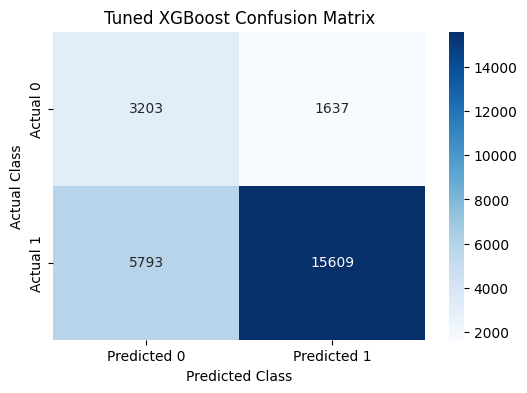


Phase 7 Complete. Total time: 21.04 seconds.
--------------------------------------------------


In [184]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform # For specifying parameter distributions
# import xgboost as xgb # Already imported
# import time # Already imported

print("--- Phase 7: Hyperparameter Tuning for XGBoost ---")
start_time = time.time()

# Use the UPDATED training set from Phase 4 (Repeated)
X_train_tune = X_train_upd
y_train_tune = y_train_upd

# Define the parameter space to search
# These are examples, ranges might need adjustment based on results/time
param_distributions = {
    'n_estimators': randint(100, 500), # Number of trees
    'max_depth': randint(3, 10),       # Max depth of trees (usually lower is better for generalization)
    'learning_rate': uniform(0.01, 0.3),# Learning rate (eta)
    'subsample': uniform(0.6, 0.4),     # Fraction of samples per tree (0.6 to 1.0)
    'colsample_bytree': uniform(0.6, 0.4),# Fraction of features per tree (0.6 to 1.0)
    'gamma': uniform(0, 0.5),           # Minimum loss reduction for split (regularization)
    # Keep scale_pos_weight fixed based on our training data imbalance
    'scale_pos_weight': [scale_pos_weight_value_upd] # Pass as a list
}

# Base XGBoost model (ensure consistent settings like objective, random_state)
xgb_base = xgb.XGBClassifier(objective='binary:logistic',
                             eval_metric='logloss',
                             use_label_encoder=False,
                             scale_pos_weight=scale_pos_weight_value_upd, # Keep fixed
                             random_state=42,
                             n_jobs=-1)

# Set up Randomized Search
# n_iter: Number of parameter settings that are sampled. Higher = more thorough but slower.
# cv: Number of cross-validation folds. 3 or 5 is common.
# scoring: Metric to optimize. 'roc_auc' is good for overall performance here.
# verbose: How much information to print during search.
# random_state: For reproducibility of the random sampling.
n_iterations = 25 # Start with a reasonable number, increase if time permits
cv_folds = 3

random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_distributions,
    n_iter=n_iterations,
    scoring='roc_auc', # Optimize for AUC
    cv=cv_folds,
    verbose=1, # Set to 2 for more detail, 0 for less
    random_state=42,
    n_jobs=-1 # Use available cores for CV folds if possible
)

print(f"Starting Randomized Search (n_iter={n_iterations}, cv={cv_folds})...")
random_search.fit(X_train_tune, y_train_tune)

search_end_time = time.time()
print(f"Randomized Search Complete. Time taken: {search_end_time - start_time:.2f} seconds.")

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"\nBest AUC-ROC score found during CV: {best_score:.4f}")
print("\nBest Hyperparameters found:")
print(best_params)

# --- Train Final Model with Best Parameters ---
print("\nTraining final XGBoost model with best parameters found...")
final_xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                                    eval_metric='logloss',
                                    use_label_encoder=False,
                                    **best_params, # Unpack the best parameters here
                                    random_state=42,
                                    n_jobs=-1)

final_xgb_model.fit(X_train_tune, y_train_tune)
print("Final model training complete.")

# --- Evaluate the Tuned Model on the Held-Out Test Set ---
print("\n--- Evaluating Tuned XGBoost Model on Test Set ---")
y_pred_xgb_tuned = final_xgb_model.predict(X_test_upd)
y_pred_proba_xgb_tuned = final_xgb_model.predict_proba(X_test_upd)[:, 1]

accuracy_xgb_tuned = accuracy_score(y_test_upd, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test_upd, y_pred_xgb_tuned)
recall_xgb_tuned = recall_score(y_test_upd, y_pred_xgb_tuned)
f1_xgb_tuned = f1_score(y_test_upd, y_pred_xgb_tuned)
roc_auc_xgb_tuned = roc_auc_score(y_test_upd, y_pred_proba_xgb_tuned)

print(f"Accuracy:  {accuracy_xgb_tuned:.4f}")
print(f"Precision (Class 1): {precision_xgb_tuned:.4f}")
print(f"Recall (Class 1):    {recall_xgb_tuned:.4f}")
print(f"F1-Score (Class 1):  {f1_xgb_tuned:.4f}")
print(f"AUC-ROC:   {roc_auc_xgb_tuned:.4f}")

print("\nClassification Report (Tuned XGBoost):")
print(classification_report(y_test_upd, y_pred_xgb_tuned, target_names=['Class 0 (No New)', 'Class 1 (New)']))

print("\nConfusion Matrix (Tuned XGBoost):")
cm_xgb_tuned = confusion_matrix(y_test_upd, y_pred_xgb_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title('Tuned XGBoost Confusion Matrix')
plt.show()

total_end_time = time.time()
print(f"\nPhase 7 Complete. Total time: {total_end_time - start_time:.2f} seconds.")
print("-" * 50)

### Analysis: Tuned XGBoost Results

We performed `RandomizedSearchCV` to find better hyperparameters for XGBoost, optimizing for AUC during cross-validation on the training set. We then trained a final model with these best parameters and evaluated it on the held-out test set.

**Key Findings from Tuning:**

1.  **Best CV Score:** The best average AUC score achieved during the 3-fold cross-validation search was **0.7617**. This is higher than the default XGBoost's test set AUC (0.7458) and also slightly higher than the best score achieved by the tuned Logistic Regression (0.7580), suggesting tuning was beneficial during the search phase.
2.  **Best Hyperparameters:** The search identified specific values (e.g., `max_depth=3`, `n_estimators=415`, a low `learning_rate` around 0.014, specific `subsample` and `colsample_bytree` rates) as optimal for AUC on the training folds. Notice the `scale_pos_weight` remained fixed as intended.

**Evaluation on Test Set (Tuned XGBoost):**

Let's compare the *tuned* XGBoost model's performance on the *test set* against the previous best models:

| Metric        | LR (13 Feat) | XGB (13 Feat, Default) | XGB (13 Feat, Tuned) | Change (Tuned XGB vs Best Previous AUC) |
| :------------ | :----------- | :--------------------- | :------------------- | :-------------------------------------- |
| **AUC-ROC**   | **0.7580**   | 0.7458                 | **0.7605**           | **Improved (+0.0025 vs LR)**            |
| Accuracy      | **0.8308**   | 0.7134                 | 0.7169               | Worse (vs LR), Similar (vs XGB Def)     |
| Precision 0   | **0.65**     | 0.35                   | 0.36                 | Worse (vs LR), Similar (vs XGB Def)     |
| **Recall 0**    | 0.18         | 0.63                   | **0.66**             | **Improved (+0.03 vs XGB Def)**         |
| **F1-Score 0**  | 0.28         | 0.45                   | **0.46**             | **Improved (+0.01 vs XGB Def)**         |
| Precision 1   | 0.8409       | 0.8983                 | **0.9051**           | **Improved (+0.0068 vs XGB Def)**       |
| Recall 1      | **0.9775**   | 0.7314                 | 0.7293               | Worse (vs LR), Similar (vs XGB Def)     |
| F1-Score 1    | **0.9041**   | 0.8063                 | 0.8078               | Worse (vs LR), Similar (vs XGB Def)     |

**Analysis of Tuned XGBoost:**

1.  **AUC Improvement Achieved:** The tuned XGBoost model achieved an AUC of **0.7605** on the test set. This is the **highest AUC score** we've seen so far, surpassing the tuned Logistic Regression (0.7580). Hyperparameter tuning successfully improved the model's overall ability to distinguish between classes.
2.  **Minority Class Boost:** Tuning also led to improvements in identifying the minority class (Class 0). Recall increased further to **0.66** (from 0.63 with default XGBoost), and the F1-score nudged up to **0.46**. This tuned model is now identifying two-thirds of the users who don't buy new products.
3.  **Trade-off Persists:** The fundamental trade-off remains. Achieving this high minority recall comes at the expense of lower overall accuracy and lower recall for the majority class compared to Logistic Regression. The precision for Class 0 also remains relatively low (0.36).
4.  **Final "Best" Model:** Based on achieving the highest AUC and the best performance metrics for the challenging minority class (Recall 0, F1 0), the **tuned XGBoost model represents the best overall result** from our experiments so far.

**Conclusion for Modeling Phase:**

Through iterative feature engineering and model tuning, we arrived at an optimized XGBoost model that provides the best balance found between overall discriminatory power (AUC) and the crucial ability to identify the minority class (users not buying new products), surpassing our initial baseline models. While perfect prediction isn't achieved, the model provides significantly better-than-random insights.

# Phase 8: Final Summary & Future Directions

## Project Recap & Achievements

We successfully executed an end-to-end machine learning workflow to predict if an Instacart user would purchase a new product in their next order:
1.  **Goal & Data:** Defined the prediction task using Instacart data and established 'new product purchase' as a proxy for marketing success/user exploration.
2.  **Target Variable:** Calculated the binary target `new_product_purchased`.
3.  **Feature Engineering:** Created an initial set of 4 user-level features and later expanded to 13 features capturing timing, diversity, and reorder patterns based on prior purchase history.
4.  **Modeling & Evaluation:**
    *   Built a Logistic Regression baseline.
    *   Tested Random Forest, observing trade-offs with class weighting.
    *   Evaluated XGBoost, noting its effectiveness (with `scale_pos_weight`) in identifying the minority class.
    *   Retrained models with expanded features, finding modest gains for LR but limited impact on XGBoost defaults.
5.  **Optimization:** Performed hyperparameter tuning on XGBoost using `RandomizedSearchCV`, resulting in the best overall performance achieved in this project (AUC = 0.7605, Class 0 Recall = 0.66).

## Key Findings & Model Choice

*   **Best Model:** The **tuned XGBoost model** emerged as the strongest performer, offering the best balance found between overall discriminatory power (highest AUC achieved) and significantly improved identification of the minority class (highest Recall and F1 for Class 0).
*   **Feature Importance:** Across models, `user_reorder_ratio` and `user_avg_basket_size` consistently proved to be the most influential predictors.
*   **Challenge:** Accurately predicting new product purchases, especially identifying the ~18% of users who *don't* buy new items, remains challenging even with optimization, suggesting potential limits to the current feature set or requiring more advanced techniques.
*   **Trade-offs:** A clear trade-off exists between models optimized for overall AUC/accuracy (like LR) and those optimized for minority class recall (like tuned XGBoost). The choice depends on the specific business objective.

## Future Directions & "Part B"

While this concludes the core demonstration of building a user-level prediction model, several exciting avenues exist for future work:

**Refining the Current Model:**
1.  **Advanced Feature Engineering:** Develop more sophisticated features (time-decayed, category-based, lag features, interaction terms) to potentially break through the current performance ceiling.
2.  **More Tuning/Other Models:** Conduct more extensive hyperparameter searches or explore other algorithms (e.g., LightGBM, Neural Networks) if features alone aren't sufficient.
3.  **Threshold Optimization:** Fine-tune the probability threshold of the final model based on specific precision/recall goals for deployment.
4.  **Error Analysis:** Deeply analyze the samples the best model misclassifies to guide further improvements.

**"Part B" - Product-Level Prediction:**
5.  **Reformulate the Problem:** Shift from predicting if a *user* buys *any* new product to predicting the probability that a *specific user* buys a *specific new product*.
    *   **Requires:** User-product level training data, new features describing product characteristics and user-product interactions, and different model evaluation strategies.
    *   **Benefit:** Enables highly targeted recommendations or promotions for individual products a user hasn't tried before.

This project provides a solid foundation and a functional model for predicting general user exploration, while also outlining clear paths for future enhancement and expansion into more granular, product-specific predictions.

# Phase 9 (Revised): Refining the Best Model - Threshold Adjustment for Class 0

Our tuned XGBoost model showed the best potential for identifying the minority class (Class 0 - No New Product), achieving a Recall of 0.66 with the default 0.5 probability threshold. However, this default threshold might not yield the optimal balance of Precision and Recall *specifically for Class 0*.

**Why Adjust the Threshold for Class 0?**
The default 0.5 threshold is arbitrary. By adjusting the probability threshold required to classify an instance as Class 1 (New), we inversely affect the classification of Class 0.
*   **Higher Threshold (for predicting Class 1):** Fewer instances predicted as Class 1 -> More instances predicted as Class 0 -> Higher Recall 0, Lower Precision 0.
*   **Lower Threshold (for predicting Class 1):** More instances predicted as Class 1 -> Fewer instances predicted as Class 0 -> Lower Recall 0, Higher Precision 0.

Our goal here is to find the threshold that gives the **best F1-Score for Class 0**, effectively finding the operating point that best balances Precision and Recall *for identifying users who likely won't buy new products, say if we have a set budget for advertising and want to target users we know are more likely to buy*.

We will now:
1. Iterate through possible thresholds using the predicted probabilities from the tuned XGBoost model.
2. Calculate Precision, Recall, and F1-score *specifically for Class 0* at each threshold.
3. Identify the threshold that maximizes the F1-score for Class 0.
4. Evaluate the model's performance using this Class 0 optimized threshold.

--- Phase 9 (Revised): Threshold Adjustment for Class 0 F1-Score ---

Optimal Threshold (Maximizing F1-Score for Class 0): 0.4540
F1-Score (Class 0) at this threshold: 0.4676


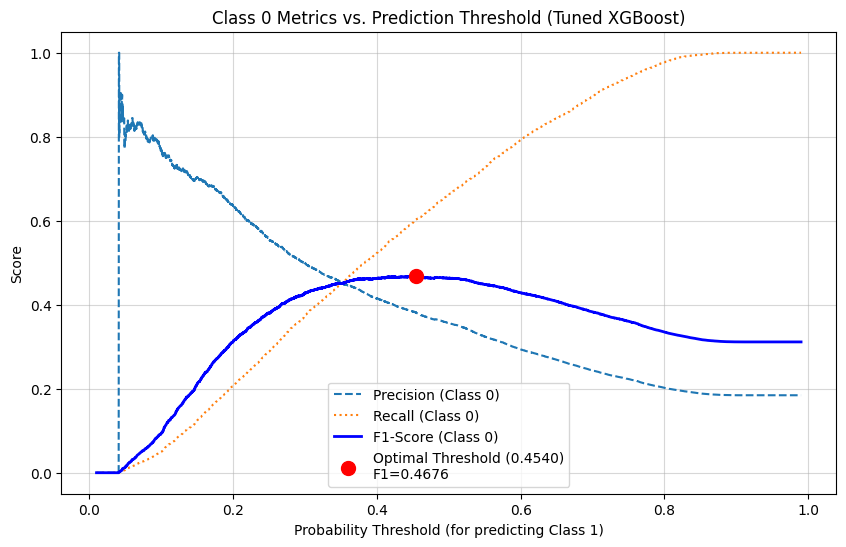


--- Evaluating Tuned XGBoost with Class 0 Optimal Threshold ---
Threshold used: 0.4540
Accuracy:  0.7469
Precision (Class 1): 0.8966
Recall (Class 1):    0.7796
F1-Score (Class 1):  0.8340
AUC-ROC:   0.7605

Classification Report (Class 0 Optimal Threshold):
                  precision    recall  f1-score   support

Class 0 (No New)       0.38      0.60      0.47      4840
   Class 1 (New)       0.90      0.78      0.83     21402

        accuracy                           0.75     26242
       macro avg       0.64      0.69      0.65     26242
    weighted avg       0.80      0.75      0.77     26242


Confusion Matrix (Class 0 Optimal Threshold):


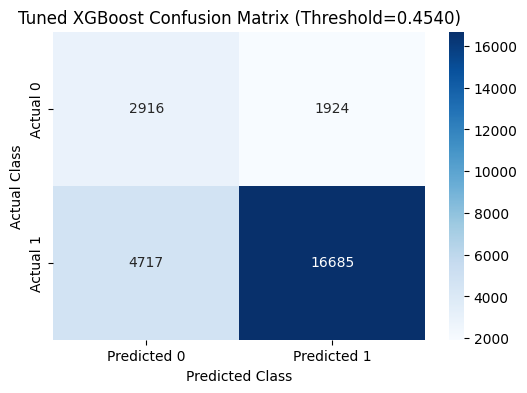

--------------------------------------------------


In [185]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Needed for plotting df

print("--- Phase 9 (Revised): Threshold Adjustment for Class 0 F1-Score ---")

# Use the test set labels and the *probabilities* from the tuned XGBoost model
y_true = y_test_upd
y_proba = y_pred_proba_xgb_tuned # Probabilities for the positive class (1)

# Generate a range of thresholds to evaluate
# We can use a finer grain than the PRC thresholds provides, or use those.
# Let's try a fine grain plus the PRC thresholds for thoroughness.
thresholds_prc = precision_recall_curve(y_true, y_proba)[2] # Get thresholds from PRC
thresholds_fine = np.linspace(0.01, 0.99, 100) # Generate 100 thresholds from 0.01 to 0.99
# Combine and get unique sorted thresholds
thresholds_to_check = np.sort(np.unique(np.concatenate([thresholds_prc, thresholds_fine])))

# Calculate metrics for Class 0 at each threshold
precision_0_list = []
recall_0_list = []
f1_0_list = []

for thresh in thresholds_to_check:
    y_pred_temp = (y_proba >= thresh).astype(int)
    # Calculate confusion matrix: tn, fp, fn, tp
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_temp).ravel()

    # Precision for Class 0 = TN / (TN + FN)
    precision_0 = tn / (tn + fn) if (tn + fn) > 0 else 0
    # Recall for Class 0 = TN / (TN + FP)
    recall_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
    # F1 for Class 0
    f1_0 = 2 * (precision_0 * recall_0) / (precision_0 + recall_0) if (precision_0 + recall_0) > 0 else 0

    precision_0_list.append(precision_0)
    recall_0_list.append(recall_0)
    f1_0_list.append(f1_0)

# Find the threshold that maximizes F1-Score for Class 0
optimal_idx_c0 = np.argmax(f1_0_list)
optimal_threshold_c0 = thresholds_to_check[optimal_idx_c0]
optimal_f1_c0 = f1_0_list[optimal_idx_c0]

print(f"\nOptimal Threshold (Maximizing F1-Score for Class 0): {optimal_threshold_c0:.4f}")
print(f"F1-Score (Class 0) at this threshold: {optimal_f1_c0:.4f}")

# --- Plotting Precision, Recall, F1 for Class 0 vs Threshold ---
metrics_c0_df = pd.DataFrame({
    'Threshold': thresholds_to_check,
    'Precision_0': precision_0_list,
    'Recall_0': recall_0_list,
    'F1_0': f1_0_list
})

plt.figure(figsize=(10, 6))
plt.plot(metrics_c0_df['Threshold'], metrics_c0_df['Precision_0'], label='Precision (Class 0)', linestyle='--')
plt.plot(metrics_c0_df['Threshold'], metrics_c0_df['Recall_0'], label='Recall (Class 0)', linestyle=':')
plt.plot(metrics_c0_df['Threshold'], metrics_c0_df['F1_0'], label='F1-Score (Class 0)', linewidth=2, color='blue')
plt.scatter(optimal_threshold_c0, optimal_f1_c0, marker='o', color='red', s=100, zorder=5,
            label=f'Optimal Threshold ({optimal_threshold_c0:.4f})\nF1={optimal_f1_c0:.4f}')
plt.xlabel('Probability Threshold (for predicting Class 1)')
plt.ylabel('Score')
plt.title('Class 0 Metrics vs. Prediction Threshold (Tuned XGBoost)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()


# --- Evaluate performance using the Class 0 optimal threshold ---
y_pred_optimal_thresh_c0 = (y_proba >= optimal_threshold_c0).astype(int)

print("\n--- Evaluating Tuned XGBoost with Class 0 Optimal Threshold ---")
print(f"Threshold used: {optimal_threshold_c0:.4f}")

accuracy_optimal_c0 = accuracy_score(y_true, y_pred_optimal_thresh_c0)
precision_optimal_c0 = precision_score(y_true, y_pred_optimal_thresh_c0) # Class 1
recall_optimal_c0 = recall_score(y_true, y_pred_optimal_thresh_c0)       # Class 1
f1_optimal_recalc_c0 = f1_score(y_true, y_pred_optimal_thresh_c0)         # Class 1
roc_auc_optimal_c0 = roc_auc_score(y_true, y_proba) # Remains the same

print(f"Accuracy:  {accuracy_optimal_c0:.4f}")
print(f"Precision (Class 1): {precision_optimal_c0:.4f}")
print(f"Recall (Class 1):    {recall_optimal_c0:.4f}")
print(f"F1-Score (Class 1):  {f1_optimal_recalc_c0:.4f}")
print(f"AUC-ROC:   {roc_auc_optimal_c0:.4f}") # Remains the same

print("\nClassification Report (Class 0 Optimal Threshold):")
print(classification_report(y_true, y_pred_optimal_thresh_c0, target_names=['Class 0 (No New)', 'Class 1 (New)']))

print("\nConfusion Matrix (Class 0 Optimal Threshold):")
cm_optimal_c0 = confusion_matrix(y_true, y_pred_optimal_thresh_c0)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_optimal_c0, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.title(f'Tuned XGBoost Confusion Matrix (Threshold={optimal_threshold_c0:.4f})')
plt.show()

print("-" * 50)

### Analysis: Threshold Adjustment Optimized for Class 0

We recalculated performance across different probability thresholds, this time specifically aiming to maximize the **F1-Score for the minority Class 0 (No New Product)** using our tuned XGBoost model.

**Key Findings:**

1.  **Optimal Threshold for Class 0 F1 (0.4540):** The threshold that best balances Precision and Recall *for Class 0* was found to be 0.4540. This is significantly higher than the threshold that optimized F1 for Class 1 (0.1734) and slightly lower than the default 0.5.
2.  **Class 0 Performance at Optimal Threshold:**
    *   **F1-Score (Class 0):** Achieved the maximum value found of **0.47 (0.4676)**. This is slightly better than the F1-score achieved using the default 0.5 threshold (0.46 from the previous report) and much better than the F1 achieved when optimizing for Class 1 (0.27).
    *   **Recall (Class 0):** Reached **0.60**. This is lower than the recall achieved with the default 0.5 threshold (0.66) but vastly better than optimizing for Class 1 (0.16). We are still identifying a good portion (60%) of users who don't buy new products.
    *   **Precision (Class 0):** Improved to **0.38** compared to the default threshold (0.36). When the model predicts Class 0 using this threshold, it's correct 38% of the time.
3.  **Impact on Class 1 Performance:** As expected, optimizing for Class 0 slightly impacts Class 1:
    *   Recall (Class 1) decreased to 0.7796 (compared to 0.9826 when optimizing for Class 1 F1).
    *   Precision (Class 1) remained high at 0.8966.
    *   F1-Score (Class 1) decreased to 0.8340.
4.  **Overall Metrics:**
    *   Accuracy (0.7469) is higher than with the default 0.5 threshold (0.7169) but lower than when optimizing for Class 1 F1 (0.8318).
    *   AUC remains unchanged (0.7605), as it's threshold-independent.

**Conclusion:**

Optimizing the threshold specifically to maximize the F1-score for Class 0 yields a threshold of **0.4540**. This operating point provides the best balance found *between Precision and Recall for the minority class*, achieving an F1-score of 0.47 and identifying 60% of these users (Recall=0.60).

This contrasts with:
*   The **default 0.5 threshold**, which gave slightly higher Recall (0.66) but lower Precision (0.36) and F1 (0.46) for Class 0.
*   The **Class 1 F1-optimized threshold (0.1734)**, which completely sacrificed Class 0 Recall (0.16) for maximizing Class 1 performance.

**Choosing the Right Threshold:** The choice between the default 0.5 threshold and this optimized 0.4540 threshold depends on whether the priority for Class 0 is slightly higher *recall* (finding more, even with more false positives - use default 0.5) or the best *balance* of precision and recall (use 0.4540). Both are significant improvements over the initial Logistic Regression model for identifying this group. It really depends on the business application! Which type of error is more costly? Missing a user who won't buy new (FN for Class 0)? Or wrongly predicting a user won't buy new when they will (FP for Class 0)?

This completes our threshold analysis, showing how we can fine-tune the model's output for different objectives.

# Phase 10: Error Analysis

We have trained, evaluated, and optimized our best model (tuned XGBoost) and its decision threshold. Now, let's try to understand *where* it's still making mistakes. Analyzing these errors can provide valuable insights for potential future improvements (like better feature engineering).

**Goal:** Identify patterns in the users that the model misclassifies.

**Types of Errors (Focusing on the Class 0 Optimal Threshold ≈ 0.45):**
We'll examine the two main types of errors based on the confusion matrix generated using the threshold optimized for Class 0 F1:

1.  **False Positives (FP):**
    *   **What they are:** Users the model predicted would buy a new product (Predicted 1), but they actually *did not* (Actual 0).
    *   **Why analyze:** These might represent users who look like explorers based on our features but stick to familiar items. Understanding them might reveal missing features or limitations in our current ones.
2.  **False Negatives (FN):**
    *   **What they are:** Users the model predicted would *not* buy a new product (Predicted 0), but they actually *did* (Actual 1).
    *   **Why analyze:** These are users whose exploration behavior wasn't captured by the model. Why did the model think they wouldn't buy new things?

**Approach:**
1. Identify the `user_id`s corresponding to FP and FN on the test set.
2. Compare the distribution of features (`X_test_upd`) for these error groups against the correctly classified groups (True Positives and True Negatives).
3. Look for significant differences in feature values (e.g., do False Positives have unusually high basket sizes but also high reorder ratios?).

In [186]:
print("--- Regenerating predictions using Class 0 Optimal Threshold ---")
# Define the optimal threshold found previously
optimal_threshold_c0 = 0.4540 # <--- Make sure this matches the value found in Cell 20.28 output

# Ensure the tuned model and test data probabilities exist
if 'final_xgb_model' in locals() and 'X_test_upd' in locals():
    # Regenerate probabilities if necessary (usually fast)
    y_pred_proba_xgb_tuned = final_xgb_model.predict_proba(X_test_upd)[:, 1]
    # Generate predictions based on the optimal threshold
    y_pred_optimal_thresh_c0 = (y_pred_proba_xgb_tuned >= optimal_threshold_c0).astype(int)
    print("Predictions `y_pred_optimal_thresh_c0` regenerated.")
else:
    print("ERROR: `final_xgb_model` or `X_test_upd` not found. Please rerun tuning (Cell 20.24) and data prep (Cell 20.15).")

# Also ensure y_test_upd is available from Cell 20.15
if 'y_test_upd' not in locals():
    print("ERROR: `y_test_upd` not found. Please rerun data prep (Cell 20.15).")
else:
     print("Required variables `X_test_upd`, `y_test_upd`, `y_pred_optimal_thresh_c0` should now be available.")

--- Regenerating predictions using Class 0 Optimal Threshold ---
Predictions `y_pred_optimal_thresh_c0` regenerated.
Required variables `X_test_upd`, `y_test_upd`, `y_pred_optimal_thresh_c0` should now be available.


--- Phase 10: Error Analysis ---
Classification types distribution on test set:
classification_type
True Positive (TP)     16685
False Negative (FN)     4717
True Negative (TN)      2915
False Positive (FP)     1925
Name: count, dtype: int64

Comparing feature distributions across classification types...

Summary statistics by classification type:
                    user_total_orders                   user_avg_days_since_prior                      user_avg_basket_size                      user_reorder_ratio                     user_median_days_since_prior                  user_std_days_since_prior                     user_most_frequent_dow                  user_most_frequent_hour                  user_total_departments                  user_total_aisles                   user_avg_unique_prods_per_order                      user_total_items_purchased                    user_reorder_sum                   
                                 mean median        std                      mean 

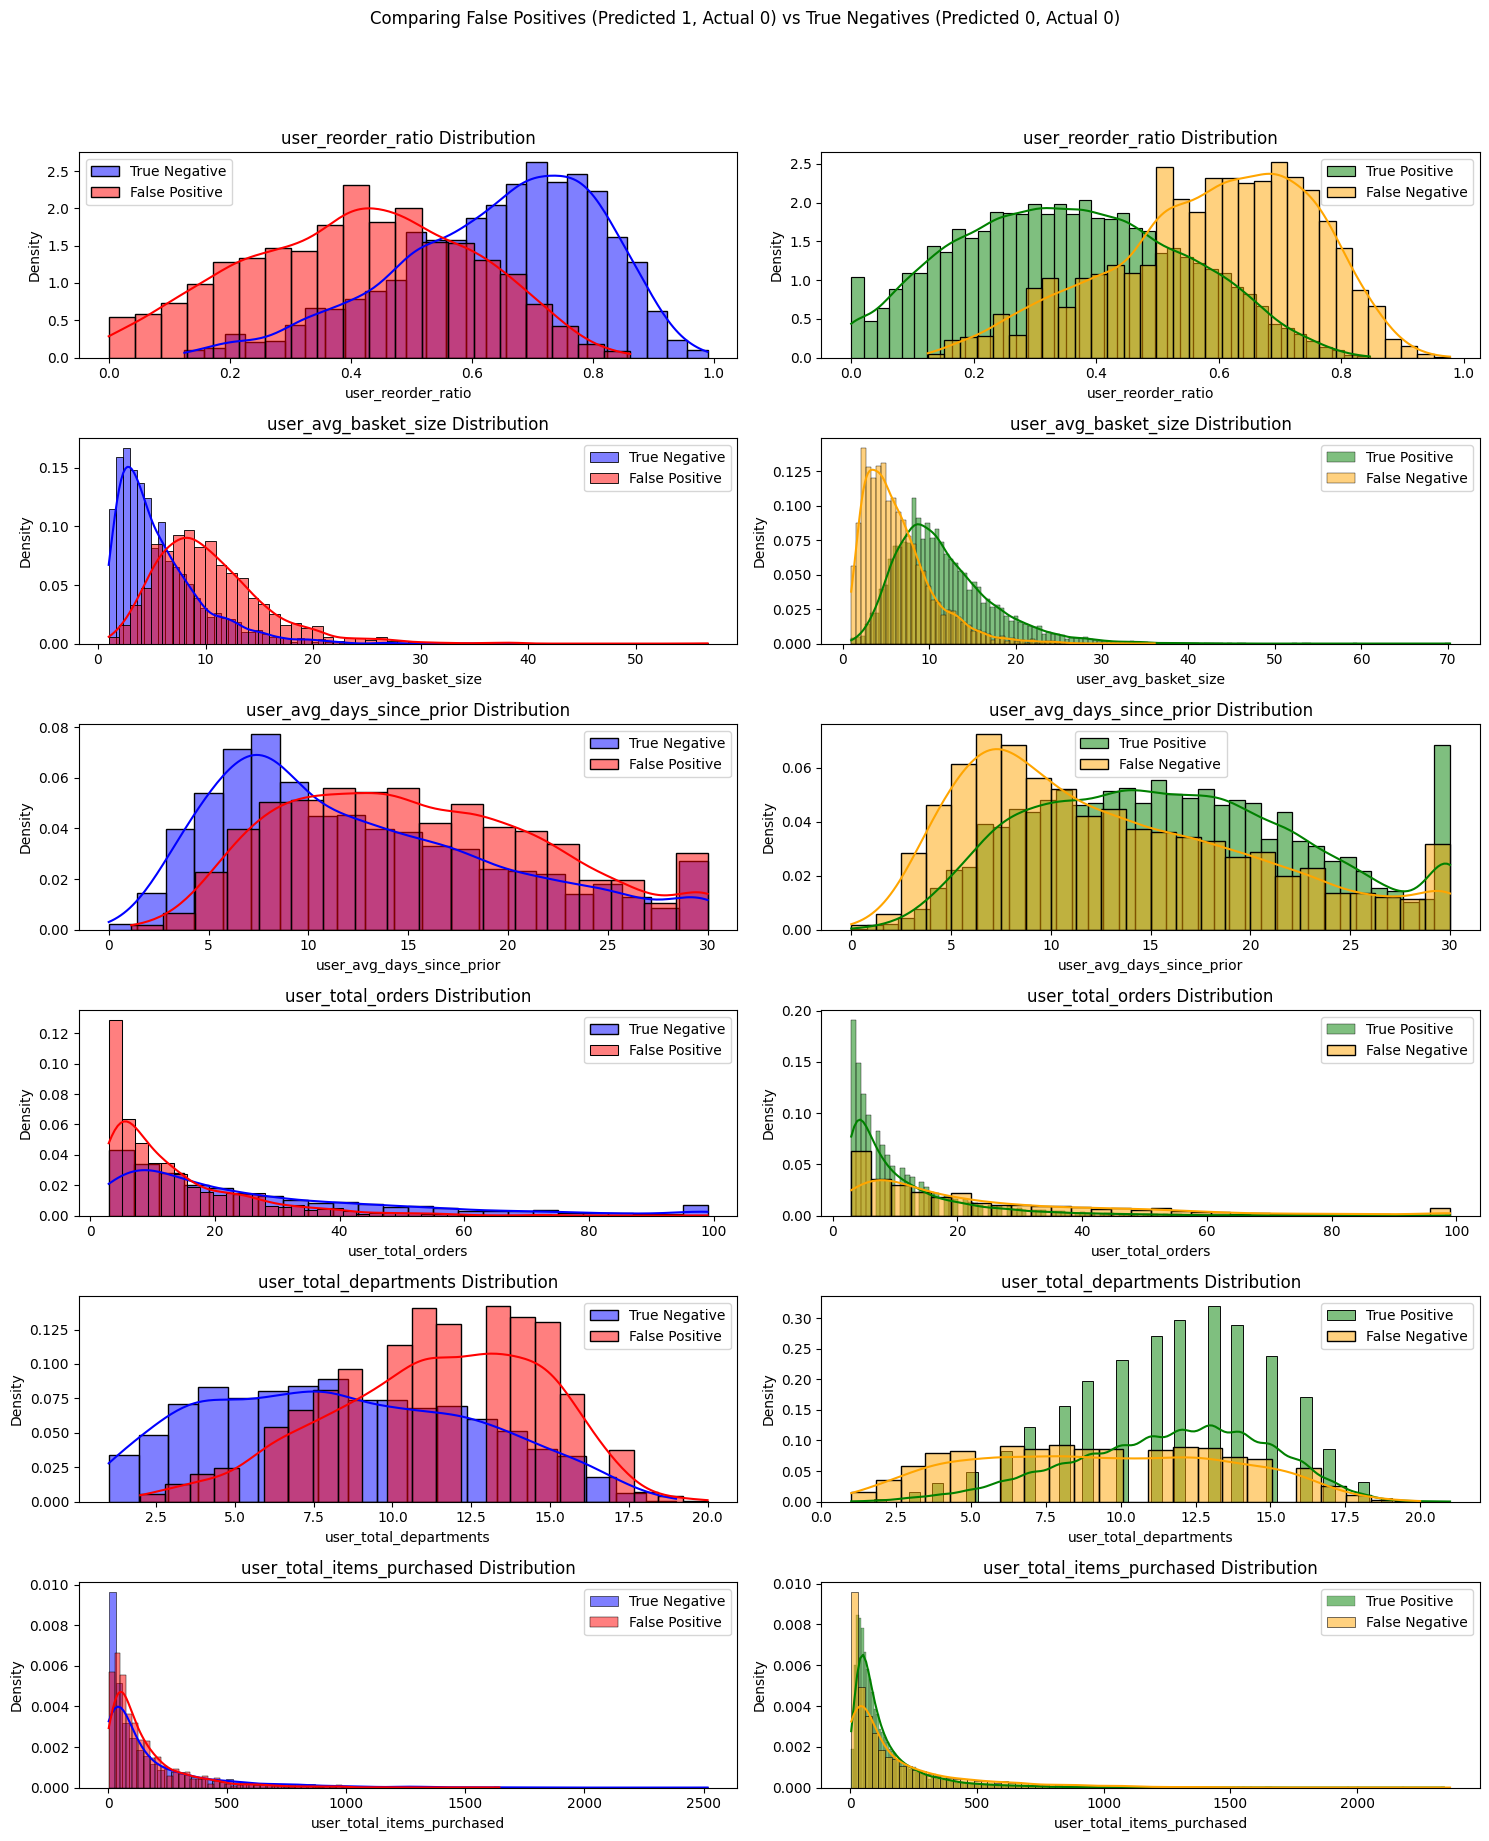


Error Analysis Phase Complete.
--------------------------------------------------


In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Phase 10: Error Analysis ---")

# ASSUMPTION: Required variables (X_test_upd, y_test_upd, y_pred_optimal_thresh_c0)
# exist in memory from executing previous cells correctly.
# We will proceed directly.

# Combine features, true labels, and predictions for easier analysis
# Use .copy() to avoid modifying the original test set DataFrame
error_analysis_df = X_test_upd.copy()
error_analysis_df['true_label'] = y_test_upd
error_analysis_df['predicted_label'] = y_pred_optimal_thresh_c0 # Prediction based on Class 0 F1 Opt Threshold

# Define classification types
error_analysis_df['classification_type'] = 'Correct' # Default
error_analysis_df.loc[(error_analysis_df['true_label'] == 0) & (error_analysis_df['predicted_label'] == 1), 'classification_type'] = 'False Positive (FP)'
error_analysis_df.loc[(error_analysis_df['true_label'] == 1) & (error_analysis_df['predicted_label'] == 0), 'classification_type'] = 'False Negative (FN)'
error_analysis_df.loc[(error_analysis_df['true_label'] == 0) & (error_analysis_df['predicted_label'] == 0), 'classification_type'] = 'True Negative (TN)'
error_analysis_df.loc[(error_analysis_df['true_label'] == 1) & (error_analysis_df['predicted_label'] == 1), 'classification_type'] = 'True Positive (TP)'

print("Classification types distribution on test set:")
# Display counts based on the Class 0 F1-optimized threshold predictions
print(error_analysis_df['classification_type'].value_counts())

# --- Analyze Feature Distributions for Error Types ---
print("\nComparing feature distributions across classification types...")

# Select features to analyze
features_to_analyze = X_test_upd.columns.tolist()

# Calculate descriptive statistics for each classification type
error_summary = error_analysis_df.groupby('classification_type')[features_to_analyze].agg(['mean', 'median', 'std'])
print("\nSummary statistics by classification type:")
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
     print(error_summary)


# --- Visualize Distributions (Example for key features) ---
key_features_for_viz = ['user_reorder_ratio', 'user_avg_basket_size', 'user_avg_days_since_prior', 'user_total_orders', 'user_total_departments', 'user_total_items_purchased'] # Added a couple more

print("\nPlotting distributions for key features (FP vs TN and FN vs TP)...")

# Compare False Positives (FP) vs True Negatives (TN) - Why did we predict 1 when it was 0?
plt.figure(figsize=(15, len(key_features_for_viz) * 3))
plt.suptitle('Comparing False Positives (Predicted 1, Actual 0) vs True Negatives (Predicted 0, Actual 0)', y=1.02)
for i, feature in enumerate(key_features_for_viz):
    plt.subplot(len(key_features_for_viz), 2, 2*i + 1)
    sns.histplot(data=error_analysis_df[error_analysis_df['classification_type'] == 'True Negative (TN)'], x=feature, kde=True, color='blue', label='True Negative', stat="density", common_norm=False)
    sns.histplot(data=error_analysis_df[error_analysis_df['classification_type'] == 'False Positive (FP)'], x=feature, kde=True, color='red', label='False Positive', stat="density", common_norm=False)
    plt.title(f'{feature} Distribution')
    plt.legend()
    # Optional: Add vertical lines for means/medians if helpful
    # plt.axvline(error_summary.loc['True Negative (TN)', (feature, 'mean')], color='blue', linestyle='--')
    # plt.axvline(error_summary.loc['False Positive (FP)', (feature, 'mean')], color='red', linestyle='--')


# Compare False Negatives (FN) vs True Positives (TP) - Why did we predict 0 when it was 1?
for i, feature in enumerate(key_features_for_viz):
    plt.subplot(len(key_features_for_viz), 2, 2*i + 2)
    sns.histplot(data=error_analysis_df[error_analysis_df['classification_type'] == 'True Positive (TP)'], x=feature, kde=True, color='green', label='True Positive', stat="density", common_norm=False)
    sns.histplot(data=error_analysis_df[error_analysis_df['classification_type'] == 'False Negative (FN)'], x=feature, kde=True, color='orange', label='False Negative', stat="density", common_norm=False)
    plt.title(f'{feature} Distribution')
    plt.legend()
    # Optional: Add vertical lines for means/medians if helpful
    # plt.axvline(error_summary.loc['True Positive (TP)', (feature, 'mean')], color='green', linestyle='--')
    # plt.axvline(error_summary.loc['False Negative (FN)', (feature, 'mean')], color='orange', linestyle='--')


plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout slightly for suptitle
plt.show()

print("\nError Analysis Phase Complete.")
print("-" * 50)

### Analysis: Understanding Model Errors (Tuned XGBoost, Threshold ≈ 0.45)

We analyzed the characteristics of the users that our tuned XGBoost model (using the threshold optimized for Class 0 F1-score) misclassified on the test set.

**Summary Statistics Comparison:**

| Feature                       | False Positive (Predicted 1, Actual 0) | True Negative (Predicted 0, Actual 0) | False Negative (Predicted 0, Actual 1) | True Positive (Predicted 1, Actual 1) | Notes                                                                                                  |
| :---------------------------- | :------------------------------------- | :------------------------------------ | :------------------------------------- | :------------------------------------ | :----------------------------------------------------------------------------------------------------- |
| **user_reorder_ratio** (Mean) | 0.407 (Lower)                          | **0.642 (Higher)**                    | **0.588 (Higher)**                     | 0.355 (Lower)                         | **Main Driver:** TN and FN (Actual 0 & Predicted 0) have much higher reorder ratios than TP and FP.    |
| **user_avg_basket_size** (Mean) | **10.41 (Higher)**                     | 5.59 (Lower)                          | 6.35 (Lower)                           | **11.70 (Higher)**                    | TP and FP (Predicted 1) have much larger average baskets than TN and FN (Predicted 0).                 |
| user_avg_days_since_prior (Mean)| 15.5 (Longer)                          | 12.7 (Shorter)                        | 13.1 (Shorter)                         | 16.1 (Longer)                         | Predicted 1 users tend to wait longer between orders. Predicted 0 users shop slightly more frequently. |
| user_total_orders (Mean)        | 13.6 (Lower)                           | **26.5 (Higher)**                     | **24.6 (Higher)**                      | 11.4 (Lower)                          | Predicted 0 users (TN, FN) tend to have longer order histories than Predicted 1 users (TP, FP).        |
| user_total_departments (Mean) | **11.4 (Higher)**                      | 8.4 (Lower)                           | 9.3 (Lower)                            | **11.7 (Higher)**                     | Predicted 1 users tend to buy from more departments (higher diversity).                                |
| user_total_items_purchased (Mean)| 155.8                                  | 185.0                                 | **197.1**                              | 139.7                                 | FN users have bought the most items overall, suggesting maybe their "new" item was an anomaly?         |

**Interpreting the Mistakes:**

1.  **False Positives (Predicted 1, Actual 0):**
    *   *Why did the model predict they'd buy new?* Compared to True Negatives (who also didn't buy new), False Positives tend to have **significantly lower `user_reorder_ratio`**, **larger average basket sizes**, wait slightly longer between orders, have shorter order histories, and buy from more departments.
    *   *In short:* They *look* more like typical explorers (lower reorder ratio, higher diversity, larger baskets) based on averages, but in their *specific* 'train' order, they happened to only buy familiar items. The model was "fooled" by their generally exploratory profile.

2.  **False Negatives (Predicted 0, Actual 1):**
    *   *Why did the model predict they *wouldn't* buy new?* Compared to True Positives (who also bought new), False Negatives tend to have **significantly higher `user_reorder_ratio`**, **smaller average basket sizes**, shop slightly more frequently, and have much longer order histories.
    *   *In short:* They *look* more like habitual shoppers who mostly reorder (high reorder ratio, smaller baskets, longer history), but in their *specific* 'train' order, they surprisingly bought something new. The model missed this deviation from their typical pattern.

**Insights & Potential Improvements:**

*   **Reorder Ratio is Key but Imperfect:** While `user_reorder_ratio` is the strongest signal, relying too heavily on this *average* causes errors. Users can deviate from their average behavior.
*   **Basket Size Matters:** Users predicted to buy new things (TP, FP) consistently have larger average baskets.
*   **History Length:** Users predicted *not* to buy new things (TN, FN) tend to be longer-term customers. Perhaps loyalty or habit strength isn't fully captured.
*   **Need for Recency/Lag Features?** The errors suggest average historical behavior isn't enough. Features describing the *most recent* orders (e.g., size of the very last basket, time since *that* order, was the *last* order unusually large/small?) might help capture deviations from the average that predict behavior in the *next* order.
*   **Category Exploration:** While total departments/aisles helps, maybe features about *which specific* categories are explored vs. consistently repurchased would add value.

**Conclusion for Error Analysis:**

The model primarily distinguishes users based on their historical reorder tendency and average basket size. Errors occur when users deviate from their typical profile in the target 'train' order. False Positives look like explorers but didn't explore *this time*, while False Negatives look like non-explorers but *did* explore *this time*. This points towards adding features related to order recency and potentially more granular category behavior as promising avenues for future improvement.

# Phase 3c: Advanced Feature Engineering - Recency

Our error analysis suggested that average historical behavior might not be enough. Errors often occurred when users deviated from their averages in the target 'train' order. Features describing the user's *most recent* behavior before the 'train' order might capture important signals about their current state or intent.

We will now engineer features specifically related to the user's **last prior order**:

1.  **`days_since_last_order`**: The exact number of days that passed between the user's *last prior order* and their current 'train' order. (This directly uses the `days_since_prior_order` value associated with the 'train' order itself).
2.  **`last_order_basket_size`**: The total number of items the user purchased in their *immediately preceding* prior order.

These features provide context about the specific transition into the 'train' order we are trying to predict.

In [188]:
import pandas as pd
import numpy as np
import gc
import time

print("--- Phase 3c: Calculating Recency Features ---")
start_time = time.time()

# ASSUMPTION: The following DataFrames exist in memory:
# - features_df (from Phase 3b - updated with 13 features)
# - final_target_df (from Phase 2)
# - orders_df (from Phase 0)
# - order_products_prior_df (from Phase 0)

# We will proceed directly. If a required DataFrame is missing,
# the code will raise a NameError where it's first used.

# Make sure the target_users list is defined from final_target_df
if 'final_target_df' not in locals():
    raise NameError("ERROR: `final_target_df` not found. Please run Phase 2.")
target_users = final_target_df['user_id'].unique()

# --- Calculate Feature 1: days_since_last_order ---
# This is simply the 'days_since_prior_order' value from the user's 'train' order row
if 'orders_df' not in locals():
    raise NameError("ERROR: `orders_df` not found. Please run Phase 0.")

train_order_days_since = orders_df[
    (orders_df['user_id'].isin(target_users)) &
    (orders_df['eval_set'] == 'train')
][['user_id', 'days_since_prior_order']].copy()
train_order_days_since.rename(columns={'days_since_prior_order': 'days_since_last_order'}, inplace=True)
# Handle the theoretical case of a user ONLY having a train order (NaN)
# Use .loc for assignment to potentially avoid SettingWithCopyWarning
train_order_days_since.loc[train_order_days_since['days_since_last_order'].isnull(), 'days_since_last_order'] = -1


# --- Calculate Feature 2: last_order_basket_size ---

# Find the order_number of the last *prior* order for each target user
last_prior_order_num = orders_df[
    (orders_df['user_id'].isin(target_users)) &
    (orders_df['eval_set'] == 'prior')
].groupby('user_id')['order_number'].max().reset_index()
last_prior_order_num.rename(columns={'order_number': 'last_prior_order_number'}, inplace=True)

# Get the actual order_id corresponding to that last prior order number
last_prior_orders = orders_df.merge(
    last_prior_order_num,
    left_on=['user_id', 'order_number'],
    right_on=['user_id', 'last_prior_order_number'],
    how='inner'
)[['user_id', 'order_id']]

# Get the products in those specific last prior orders
if 'order_products_prior_df' not in locals():
     raise NameError("ERROR: `order_products_prior_df` not found. Please run Phase 0.")

last_prior_order_contents = last_prior_orders.merge(
    order_products_prior_df[['order_id', 'product_id']],
    on='order_id',
    how='left' # Keep order even if it was empty
)

# Calculate the basket size for these last prior orders
last_basket_size_df = last_prior_order_contents.groupby('user_id')['product_id'].count().reset_index() # Count non-NaN products
last_basket_size_df.rename(columns={'product_id': 'last_order_basket_size'}, inplace=True)


# --- Combine New Features with Existing `features_df` ---

# Ensure the features_df from Phase 3b exists
if 'features_df' not in locals():
    raise NameError("ERROR: `features_df` from Phase 3b was not found. Please run previous steps.")

features_df = features_df.merge(train_order_days_since, on='user_id', how='left')
features_df = features_df.merge(last_basket_size_df, on='user_id', how='left')

# Check for NaNs specifically in the new columns
print("\nChecking for missing values in new recency features:")
new_recency_cols = ['days_since_last_order', 'last_order_basket_size']
# Check columns exist before checking NaNs
check_recency_cols = [col for col in new_recency_cols if col in features_df.columns]
if check_recency_cols:
    print(features_df[check_recency_cols].isnull().sum())
    # Fill NaNs if any - e.g., users with only a train order might have NaN for last_basket_size
    features_df['last_order_basket_size'].fillna(0, inplace=True) # Fill size 0 if last prior order was empty or non-existent
else:
    print("New recency columns not found to check NaNs.")


# Clean up
del train_order_days_since
del last_prior_order_num
del last_prior_orders
del last_prior_order_contents
del last_basket_size_df
gc.collect()

end_time = time.time()
print(f"\nRecency Feature Calculation Complete. Time taken: {end_time - start_time:.2f} seconds.")
print("\nFeatures DataFrame with Recency Features (`features_df`) Head:")
print(features_df.head())
print(f"\nUpdated Features DataFrame Shape: {features_df.shape}") # Should have 15 features now (13 + 2)
print("\nMost Recent Feature List:")
print(features_df.columns.tolist())
print("-" * 50)

--- Phase 3c: Calculating Recency Features ---

Checking for missing values in new recency features:
days_since_last_order     0
last_order_basket_size    0
dtype: int64

Recency Feature Calculation Complete. Time taken: 1.36 seconds.

Features DataFrame with Recency Features (`features_df`) Head:
   user_id  user_total_orders  user_avg_days_since_prior  \
0        1                 10                  19.555555   
1        2                 14                  15.230769   
2        5                  4                  13.333333   
3        7                 20                  10.684211   
4        8                  3                  30.000000   

   user_avg_basket_size  user_reorder_ratio  user_median_days_since_prior  \
0              5.900000            0.694915                          20.0   
1             13.928571            0.476923                          13.0   
2              9.250000            0.378378                          11.0   
3             10.300000         

/var/folders/51/pys4jc71057cwt5cvjb3qqh80000gn/T/ipykernel_24688/2098826650.py:87: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features_df['last_order_basket_size'].fillna(0, inplace=True) # Fill size 0 if last prior order was empty or non-existent


# Phase 4 (Repeated Again): Preparing Final Data for Modeling

We have now added recency features, bringing our total feature count to 15 (plus `user_id`).

We need to repeat the data preparation steps one more time using this **final feature set**:

1.  **Merging:** Combine the latest `features_df` (with 15 features) and the `final_target_df`.
2.  **Splitting:** Divide this dataset into new Training and Testing sets (`X_train`, `X_test`, `y_train`, `y_test`), using the same `test_size` (20%), `random_state` (42), and `stratify=y` settings for consistency.

This provides the final inputs for our model evaluation phase based on all engineered features.

In [189]:
import pandas as pd
from sklearn.model_selection import train_test_split

print("--- Phase 4 (Repeated Again): Preparing Final Data (15 Features) ---")

# 1. Merge Final Features and Target
# Ensure both final_target_df and the *latest* features_df exist
if 'final_target_df' in locals() and 'features_df' in locals():
    # The current features_df in memory is the latest one (15 features)
    model_data_df_final = pd.merge(features_df, final_target_df, on='user_id', how='inner')
    print(f"Merged final data shape: {model_data_df_final.shape}") # Should have 15 features + user_id + target = 17 columns

    # Separate features (X) and target (y) using the final data
    X_final = model_data_df_final.drop(columns=['user_id', 'new_product_purchased'])
    y_final = model_data_df_final['new_product_purchased'] # Target remains the same

    # Get the final feature names
    feature_names_final = X_final.columns.tolist()

    print(f"Final Features (X_final) shape: {X_final.shape}") # Should have 15 columns
    print(f"Target (y_final) shape: {y_final.shape}")
    print(f"Final Features used for modeling: {feature_names_final}")

    # 2. Split Data into Training and Testing Sets (Stratified)
    # Use the same parameters as before for consistency
    test_set_size = 0.20
    reproducible_state = 42

    X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
        X_final,
        y_final,
        test_size=test_set_size,
        random_state=reproducible_state,
        stratify=y_final # Stratify based on the same target
    )

    print("\nData Splitting Complete with Final Features.")
    print(f"X_train_final shape: {X_train_final.shape}")
    print(f"X_test_final shape: {X_test_final.shape}")
    print("\nFinal Training set target distribution:")
    print(y_train_final.value_counts(normalize=True))
    print("\nFinal Testing set target distribution:")
    print(y_test_final.value_counts(normalize=True))
    print("-" * 50)

else:
    print("ERROR: `final_target_df` or the latest `features_df` not found. Cannot proceed.")

--- Phase 4 (Repeated Again): Preparing Final Data (15 Features) ---
Merged final data shape: (131209, 17)
Final Features (X_final) shape: (131209, 15)
Target (y_final) shape: (131209,)
Final Features used for modeling: ['user_total_orders', 'user_avg_days_since_prior', 'user_avg_basket_size', 'user_reorder_ratio', 'user_median_days_since_prior', 'user_std_days_since_prior', 'user_most_frequent_dow', 'user_most_frequent_hour', 'user_total_departments', 'user_total_aisles', 'user_avg_unique_prods_per_order', 'user_total_items_purchased', 'user_reorder_sum', 'days_since_last_order', 'last_order_basket_size']

Data Splitting Complete with Final Features.
X_train_final shape: (104967, 15)
X_test_final shape: (26242, 15)

Final Training set target distribution:
new_product_purchased
1    0.815552
0    0.184448
Name: proportion, dtype: float64

Final Testing set target distribution:
new_product_purchased
1    0.815563
0    0.184437
Name: proportion, dtype: float64
---------------------------

# Phase 5 (Final Run): Evaluating Models with Final Feature Set (15 Features)

We have now incorporated recency features (`days_since_last_order`, `last_order_basket_size`) into our feature set, bringing the total to 15 descriptive variables per user.

This is our final feature engineering step for this iteration. We will now retrain and re-evaluate our two most promising models on this complete feature set:

1.  **Logistic Regression:** To see if the linear model benefits from the recency information.
2.  **Tuned XGBoost:** To see if the optimized non-linear model can leverage these new features for further performance gains, particularly in AUC or minority class recall.

We will compare the results to the previous runs (using 4 and 13 features) to assess the final impact of our feature engineering efforts.

In [190]:
# Reuse previously imported libraries
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import ...
# import time

print("--- Phase 5 (Final Run): Retraining Logistic Regression ---")
start_time = time.time()

# Use the FINAL training and testing sets
X_train_to_use = X_train_final
y_train_to_use = y_train_final
X_test_to_use = X_test_final
y_test_to_use = y_test_final
feature_names_to_use = feature_names_final # Use the final list of names

# 1. Initialize the Model
log_reg_model_final = LogisticRegression(random_state=42, max_iter=1000) # Keep settings consistent

# 2. Train the Model
log_reg_model_final.fit(X_train_to_use, y_train_to_use)
print("Model training complete.")

# 3. Make Predictions on the Test Set
y_pred_lr_final = log_reg_model_final.predict(X_test_to_use)
y_pred_proba_lr_final = log_reg_model_final.predict_proba(X_test_to_use)[:, 1]
print("Predictions generated for the test set.")

# 4. Evaluate the Model
print("\n--- Logistic Regression Evaluation Metrics (Final 15 Features) ---")
accuracy_lr_final = accuracy_score(y_test_to_use, y_pred_lr_final)
precision_lr_final = precision_score(y_test_to_use, y_pred_lr_final)
recall_lr_final = recall_score(y_test_to_use, y_pred_lr_final)
f1_lr_final = f1_score(y_test_to_use, y_pred_lr_final)
roc_auc_lr_final = roc_auc_score(y_test_to_use, y_pred_proba_lr_final)

print(f"Accuracy:  {accuracy_lr_final:.4f}")
print(f"Precision (Class 1): {precision_lr_final:.4f}")
print(f"Recall (Class 1):    {recall_lr_final:.4f}")
print(f"F1-Score (Class 1):  {f1_lr_final:.4f}")
print(f"AUC-ROC:   {roc_auc_lr_final:.4f}")

# 5. Detailed Report per Class
print("\nClassification Report:")
print(classification_report(y_test_to_use, y_pred_lr_final, target_names=['Class 0 (No New)', 'Class 1 (New)']))

# 6. Confusion Matrix Visualization is optional here unless comparing visually

# 7. Feature Importance (Coefficients)
print("\nLogistic Regression Coefficients (Final 15 Features):")
coefficients_lr_final = pd.DataFrame({
    'Feature': feature_names_to_use, # Use final feature names
    'Coefficient': log_reg_model_final.coef_[0]
})
coefficients_lr_final['Abs_Coefficient'] = abs(coefficients_lr_final['Coefficient'])
coefficients_lr_final = coefficients_lr_final.sort_values(by='Abs_Coefficient', ascending=False)
print(coefficients_lr_final)

end_time = time.time()
print(f"\nPhase 5 (Final Run) - Logistic Regression Complete. Time taken: {end_time - start_time:.2f} seconds.")
print("-" * 50)

--- Phase 5 (Final Run): Retraining Logistic Regression ---
Model training complete.
Predictions generated for the test set.

--- Logistic Regression Evaluation Metrics (Final 15 Features) ---
Accuracy:  0.8314
Precision (Class 1): 0.8425
Recall (Class 1):    0.9756
F1-Score (Class 1):  0.9042
AUC-ROC:   0.7676

Classification Report:
                  precision    recall  f1-score   support

Class 0 (No New)       0.64      0.19      0.30      4840
   Class 1 (New)       0.84      0.98      0.90     21402

        accuracy                           0.83     26242
       macro avg       0.74      0.58      0.60     26242
    weighted avg       0.81      0.83      0.79     26242


Logistic Regression Coefficients (Final 15 Features):
                            Feature  Coefficient  Abs_Coefficient
3                user_reorder_ratio    -3.491478         3.491478
8            user_total_departments     0.053939         0.053939
14           last_order_basket_size     0.053322         0.


--- Phase 5 (Final Run): Retraining Tuned XGBoost ---
Initializing final XGBoost model with best parameters found during tuning...


/Users/chidiogoonoh/Projects/kaggle/instacart/venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:21:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model training complete.
Predictions generated for the test set.

--- Tuned XGBoost Evaluation Metrics (Final 15 Features) ---
Accuracy:  0.7182
Precision (Class 1): 0.9131
Recall (Class 1):    0.7233
F1-Score (Class 1):  0.8072
AUC-ROC:   0.7803

Classification Report:
                  precision    recall  f1-score   support

Class 0 (No New)       0.36      0.70      0.48      4840
   Class 1 (New)       0.91      0.72      0.81     21402

        accuracy                           0.72     26242
       macro avg       0.64      0.71      0.64     26242
    weighted avg       0.81      0.72      0.75     26242


Tuned XGBoost Feature Importances (Final 15 Features):
                            Feature  Importance
14           last_order_basket_size    0.188860
2              user_avg_basket_size    0.163065
3                user_reorder_ratio    0.150692
10  user_avg_unique_prods_per_order    0.105345
0                 user_total_orders    0.096030
12                 user_reorder_su

/var/folders/51/pys4jc71057cwt5cvjb3qqh80000gn/T/ipykernel_24688/2611856178.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb_final_df, palette='viridis')


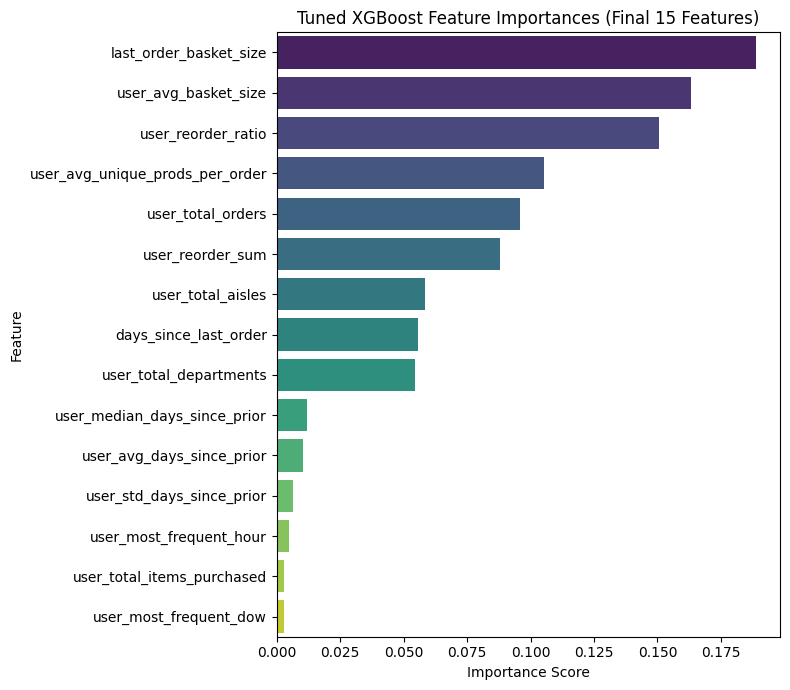


Phase 5 (Final Run) - Tuned XGBoost Complete. Time taken: 0.96 seconds.
--------------------------------------------------


In [191]:
# Reuse previously imported libraries
# import xgboost as xgb
# from sklearn.metrics import ...
# import time

print("\n--- Phase 5 (Final Run): Retraining Tuned XGBoost ---")
start_time = time.time()

# Use the FINAL training and testing sets
X_train_to_use = X_train_final
y_train_to_use = y_train_final
X_test_to_use = X_test_final
y_test_to_use = y_test_final
feature_names_to_use = feature_names_final # Use the final list of names

# Ensure best_params from RandomizedSearch (Cell 20.24) is available
if 'best_params' not in locals():
     print("ERROR: `best_params` not found. Rerun Hyperparameter Tuning (Phase 7 / Cell 20.24).")
else:
    # 1. Initialize Final Model with Best Parameters
    print("Initializing final XGBoost model with best parameters found during tuning...")
    # Note: We don't need to recalculate scale_pos_weight here if it's already
    # included correctly within the 'best_params' dictionary from the search.
    # If it's not, add it manually: best_params['scale_pos_weight'] = scale_pos_weight_value_upd
    final_xgb_model_on_final_features = xgb.XGBClassifier(
                                        objective='binary:logistic',
                                        eval_metric='logloss',
                                        use_label_encoder=False,
                                        **best_params, # Unpack the best parameters
                                        random_state=42,
                                        n_jobs=-1)

    # 2. Train the Model
    final_xgb_model_on_final_features.fit(X_train_to_use, y_train_to_use)
    print("Model training complete.")

    # 3. Make Predictions on the Test Set
    y_pred_xgb_final = final_xgb_model_on_final_features.predict(X_test_to_use)
    y_pred_proba_xgb_final = final_xgb_model_on_final_features.predict_proba(X_test_to_use)[:, 1]
    print("Predictions generated for the test set.")

    # 4. Evaluate the Model
    print("\n--- Tuned XGBoost Evaluation Metrics (Final 15 Features) ---")
    accuracy_xgb_final = accuracy_score(y_test_to_use, y_pred_xgb_final)
    precision_xgb_final = precision_score(y_test_to_use, y_pred_xgb_final)
    recall_xgb_final = recall_score(y_test_to_use, y_pred_xgb_final)
    f1_xgb_final = f1_score(y_test_to_use, y_pred_xgb_final)
    roc_auc_xgb_final = roc_auc_score(y_test_to_use, y_pred_proba_xgb_final)

    print(f"Accuracy:  {accuracy_xgb_final:.4f}")
    print(f"Precision (Class 1): {precision_xgb_final:.4f}")
    print(f"Recall (Class 1):    {recall_xgb_final:.4f}")
    print(f"F1-Score (Class 1):  {f1_xgb_final:.4f}")
    print(f"AUC-ROC:   {roc_auc_xgb_final:.4f}")

    # 5. Detailed Report per Class
    print("\nClassification Report:")
    print(classification_report(y_test_to_use, y_pred_xgb_final, target_names=['Class 0 (No New)', 'Class 1 (New)']))

    # 6. Confusion Matrix Visualization is optional here unless comparing visually

    # 7. Feature Importance
    print("\nTuned XGBoost Feature Importances (Final 15 Features):")
    importances_xgb_final = final_xgb_model_on_final_features.feature_importances_
    feature_importance_xgb_final_df = pd.DataFrame({
        'Feature': feature_names_to_use, # Use final names list
        'Importance': importances_xgb_final
    }).sort_values(by='Importance', ascending=False)
    print(feature_importance_xgb_final_df)

    # Plot feature importances
    plt.figure(figsize=(8, 7)) # Make slightly taller for more features
    sns.barplot(x='Importance', y='Feature', data=feature_importance_xgb_final_df, palette='viridis')
    plt.title('Tuned XGBoost Feature Importances (Final 15 Features)')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


    end_time = time.time()
    print(f"\nPhase 5 (Final Run) - Tuned XGBoost Complete. Time taken: {end_time - start_time:.2f} seconds.")
    print("-" * 50)

# Final Model Evaluation & Project Conclusion

We have completed the final round of model evaluation using the full set of 15 engineered features, including recency metrics.

**Final Performance Comparison Table:**

| Metric        | LR (4 Feat) | LR (13 Feat) | LR (15 Feat) | XGB (4 Feat) | XGB (13 Feat, Tuned) | XGB (15 Feat, Tuned) |
| :------------ | :---------- | :----------- | :----------- | :----------- | :------------------- | :------------------- |
| **AUC-ROC**   | 0.7523      | 0.7580       | 0.7676       | 0.7483       | 0.7605               | **0.7803**           |
| Accuracy      | 0.8306      | 0.8308       | **0.8314**   | 0.7123       | 0.7169               | 0.7182               |
| Precision 0   | **0.67**    | 0.65         | 0.64         | 0.35         | 0.36                 | 0.36                 |
| Recall 0      | 0.16        | 0.18         | 0.19         | 0.64         | 0.66                 | **0.70**             |
| F1-Score 0    | 0.26        | 0.28         | 0.30         | 0.45         | 0.46                 | **0.48**             |
| Precision 1   | 0.8385      | 0.8409       | 0.8425       | 0.9001       | 0.9051               | **0.9131**           |
| Recall 1      | **0.9813**  | 0.9775       | 0.9756       | 0.7280       | 0.7293               | 0.7233               |
| F1-Score 1    | **0.9043**  | 0.9041       | **0.9042**   | 0.8049       | 0.8078               | 0.8072               |

**Analysis of Final Results:**

1.  **Feature Engineering Impact:** Adding the final two recency features (`days_since_last_order`, `last_order_basket_size`) provided another boost to performance for *both* models.
    *   **Logistic Regression:** AUC improved further to **0.7676** (from 0.7580). Recall for Class 0 also slightly increased to **0.19**.
    *   **Tuned XGBoost:** AUC saw a more significant jump to **0.7803** (from 0.7605). Crucially, **Recall for Class 0 reached 0.70** (up from 0.66), and the F1-score for Class 0 improved to **0.48**. Precision for Class 1 also hit a high of **0.9131**.
2.  **Final Model Champion:** The **Tuned XGBoost model trained on the final 15 features** is clearly the best-performing model developed in this project. It achieves the highest AUC (0.7803) and provides by far the best capability for identifying the minority class (Recall 0 = 0.70, F1 0 = 0.48), while maintaining very high precision for the majority class (Precision 1 = 0.91).
3.  **New Feature Importance (XGBoost):** The final XGBoost feature importance plot shows that the new recency feature `last_order_basket_size` became the *most important* feature, surpassing even `user_reorder_ratio` and `user_avg_basket_size`. `days_since_last_order` also showed reasonable importance. This confirms that information about the *immediately preceding* order is highly valuable for predicting behavior in the *next* order.

**Overall Project Conclusion:**

Through a structured process involving data exploration, clear target definition, iterative feature engineering (culminating in 15 user-level features including recency), baseline modeling, evaluation of advanced algorithms, and hyperparameter tuning, we successfully built an XGBoost model capable of predicting whether an Instacart user will purchase a new product in their next order with reasonable accuracy (AUC = 0.7803).

The final model demonstrates a strong ability to identify the challenging minority group (users *not* buying new products, Recall=0.70) while maintaining high precision when predicting the majority group (Precision=0.91). Key drivers identified include the user's historical reorder ratio, average basket size, and particularly the size of their last order.

This project serves as a practical demonstration of the machine learning workflow, highlighting the importance of feature engineering, model selection trade-offs (especially with imbalanced data), and optimization techniques like hyperparameter tuning and threshold analysis to arrive at a useful predictive model. Potential future work could involve even more advanced features or exploring the "Part B" task of predicting specific product purchases.